<a href="https://colab.research.google.com/github/alexfaia/PUCRIO-MVP1/blob/main/MVP1_alexfaia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise Exploratória de Dados 

## Alex Amorim Faia

### Base Microdados ENEM/INEP


## 1. Definição do Problema

Introdução - Descrição ENEM

Sobre o dataset:

O dataset utilizado neste projeto será o inep-microdados-do-enem-por-escola série histórica de 2005 A 2015, proveniente originalmente do INEP (https://legado.dados.gov.br/dataset/inep-microdados-do-enem-por-escola), 



Informações sobre os atributos:



*   1	NU_ANO				Ano da edição do ENEM por Escola
*2	CO_UF_ESCOLA			Código da Unidade da Federação da escola.
*3	SG_UF_ESCOLA			Sigla da Unidade da Federação da escola.
*4	CO_MUNICIPIO_ESCOLA		Código do município da escola.
*5	NO_MUNICIPIO_ESCOLA		Nome do município da escola.
*6	CO_ESCOLA_EDUCACENSO		Código da Escola. 
*7	NO_ESCOLA_EDUCACENSO		Nome da Escola no Educacenso do ano anterior.
*8	TP_DEPENDENCIA_ADM_ESCOLA	Tipo da dependência administrativa da entidade
*9	TP_LOCALIZACAO_ESCOLA		Tipo de Localização da escola. 
*10	NU_MATRICULAS			Número de alunos matriculados no Censo Escolar
*11	NU_PARTICIPANTES_NEC_ESP	Número de Participantes do Enem que possuem necessidade especial.
*12	NU_PARTICIPANTES		Número de Participantes do Enem que participam no cálculo da média. 
*13	NU_TAXA_PARTICIPACAO		A taxa de participação é o total de participantes no ENEM da escola dividido pelo número de matriculados no Ensino Médio da escola 
*14	NU_MEDIA_CN			Média das notas de Ciências da Natureza do Ensino Médio Regular.
*15	NU_MEDIA_CH			Média das notas de Ciências Humanas do Ensino Médio Regular. 
*16	NU_MEDIA_LP			Média das notas de Linguagens e Códigos do Ensino Médio Regular. 
*17	NU_MEDIA_MT			Média das notas de Matemática do Ensino Médio Regular. 
*18	NU_MEDIA_RED			Média das notas de Redação do Ensino Médio Regular. 
*19	NU_MEDIA_OBJ			Média da prova objetiva do Ensino Médio Regular. 
*20	NU_MEDIA_TOT			Média Total (Redação e Prova Objetiva) Ensino Médio Regular corrigida pelo número de participantes.
*21	INSE				Indicador de Nível Socioeconômico da escola
*22	PC_FORMACAO_DOCENTE		Indicador de Adequação da Formação Docente da escola para lecionar no Ensino Médio.
*23	NU_TAXA_PERMANENCIA		Indicador de Permanência na Escola para o Ensino Médio
*24	NU_TAXA_APROVACAO		Taxa de aprovação dos alunos no Ensino Médio
*25	NU_TAXA_REPROVACAO		Taxa de reprovação dos alunos no Ensino Médio
*26	NU_TAXA_ABANDONO		Taxa de abandono dos alunos no Ensino Médio
*27	PORTE_ESCOLA			O indicador de porte da escola defini o tamanho da escola pelo número de alunos matriculados no último ano do Ensino médio



A hipótese a ser avaliada nesta análise é se algumas das seguintes variáveis influenciam na pontuação EXAME.



## 2. Carga de dados
Nesta primeira etapa será feita a importação do dados, definição de funções úteis na análise e a carga do dataset.

### Importando Biliotecas

In [111]:
# imports
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import missingno as ms 




### *Preparando o Dataset*

Carregando o dataset.

In [112]:
# Conexão com GitHub
pd.set_option('display.max_columns', None)  
url_dados = "https://raw.githubusercontent.com/alexfaia/PUCRIO-MVP1/main/MICRODADOS_ENEM_ESCOLA.csv"

col_names = [ "NU_ANO",
					    "CO_UF_ESCOLA",
					    "SG_UF_ESCOLA",
					    "CO_MUNICIPIO_ESCOLA",
					    "NO_MUNICIPIO_ESCOLA",
					    "CO_ESCOLA_EDUCACENSO",
					    "NO_ESCOLA_EDUCACENSO",
					    "TP_DEPENDENCIA_ADM_ESCOLA",
					    "TP_LOCALIZACAO_ESCOLA",
					    "NU_MATRICULAS",
					    "NU_PARTICIPANTES_NEC_ESP",
					    "NU_PARTICIPANTES",
					    "NU_TAXA_PARTICIPACAO",
					    "NU_MEDIA_CN",
					    "NU_MEDIA_CH",
					    "NU_MEDIA_LP",
					    "NU_MEDIA_MT",
					    "NU_MEDIA_RED",
					    "NU_MEDIA_OBJ",
					    "NU_MEDIA_TOT",
					    "INSE",
					    "PC_FORMACAO_DOCENTE",
					    "NU_TAXA_PERMANENCIA",
					    "NU_TAXA_APROVACAO",
					    "NU_TAXA_REPROVACAO",
					    "NU_TAXA_ABANDONO",
					    "PORTE_ESCOLA"]


ds = pd.read_csv(url_dados, 
                 delimiter=';',
                 encoding='ISO-8859-1', 
                 names=col_names)
ds = ds.drop(index=0)
# verifica o tipo
print(type(ds))

# exibe as 5 primeiras linhas
ds.head(5)



<class 'pandas.core.frame.DataFrame'>


,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
1,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,NaN,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.03,NaN,NaN,NaN,91.90,8.10,0.00,Maior que 90 alunos
2,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
3,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,NaN,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.83,NaN,NaN,NaN,86.50,12.40,1.10,Maior que 90 alunos
4,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,NaN,171,NaN,NaN,NaN,NaN,NaN,72.16,60.02,NaN,NaN,NaN,NaN,90.30,9.70,0.00,Maior que 90 alunos
5,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.84,NaN,NaN,NaN,74.20,21.00,4.80,De 1 a 30 alunos


Alterando os nomes para portugues, para uma melhor documentação.

In [113]:
# Dimensões do dataset
print(f'*** Dimensões do dataset ***\n')
print(ds.shape)


*** Dimensões do dataset ***

(172305, 27)


In [114]:
# exibe as 10 primeiras e 10 últimas linhas para ter uma amostra inicial sobre dados missing
display(ds.head(10))
display(ds.tail(10))

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
1,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,NaN,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.03,NaN,NaN,NaN,91.90,8.10,0.00,Maior que 90 alunos
2,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
3,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,NaN,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.83,NaN,NaN,NaN,86.50,12.40,1.10,Maior que 90 alunos
4,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,NaN,171,NaN,NaN,NaN,NaN,NaN,72.16,60.02,NaN,NaN,NaN,NaN,90.30,9.70,0.00,Maior que 90 alunos
5,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.84,NaN,NaN,NaN,74.20,21.00,4.80,De 1 a 30 alunos
6,2008,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,33,NaN,13,NaN,NaN,NaN,NaN,NaN,59.81,42.49,NaN,NaN,NaN,NaN,79.10,17.90,3.00,De 31 a 60 alunos
7,2005,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,25,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.44,NaN,NaN,NaN,69.30,25.00,5.70,De 1 a 30 alunos
8,2005,11,RO,1100205,Porto Velho,11000180,INTERATIVO CURSOS E COLEGIO,4,1,87,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.46,NaN,NaN,NaN,86.50,13.50,0.00,De 61 a 90 alunos
9,2006,11,RO,1100205,Porto Velho,11000180,INTERATIVO CURSOS E COLEGIO,4,1,82,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.73,NaN,NaN,NaN,NaN,NaN,NaN,De 61 a 90 alunos
10,2008,11,RO,1100205,Porto Velho,11000180,INTERAÇÃO - CURSOS E COLÉGIO,4,1,31,NaN,11,NaN,NaN,NaN,NaN,NaN,59.55,45.6,NaN,NaN,NaN,NaN,90.80,9.20,0.00,De 31 a 60 alunos


,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
172296,2014,53,DF,5300108,Brasília,53068092,CED 01 DO RIACHO FUNDO II,2,1,206,4.0,149,72.33,473.69,538.9,503.4,445.04,440.54,NaN,NaN,NaN,82.8,77.18,72.1,27.7,0.2,Maior que 90 alunos
172297,2015,53,DF,5300108,Brasília,53068092,CED 01 DO RIACHO FUNDO II,2,1,105,7.0,76,72.38,469.75,554.48,507.93,456.23,514.74,NaN,NaN,Grupo 3,80.2,69.74,74.8,13.2,12.0,Maior que 90 alunos
172298,2010,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,36,NaN,12,33.3,433.93,518.04,508.94,450.28,568.75,NaN,NaN,NaN,NaN,NaN,56.1,25.7,18.2,De 31 a 60 alunos
172299,2011,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,69,NaN,40,57.97,436.16,456.56,515.61,459.84,517.0,NaN,NaN,NaN,NaN,NaN,62.3,21.1,16.6,De 61 a 90 alunos
172300,2012,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,141,NaN,118,83.69,436.96,492.55,475.59,453.56,480.17,NaN,NaN,NaN,NaN,NaN,61.3,24.9,13.8,Maior que 90 alunos
172301,2013,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,213,2.0,147,69.01,445.09,496.43,477.62,483.17,503.86,NaN,NaN,NaN,91.8,NaN,83.1,9.1,7.8,Maior que 90 alunos
172302,2014,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,138,2.0,100,72.46,471.92,542.91,500.61,453.76,470.2,NaN,NaN,NaN,72.0,82.0,81.2,17.5,1.3,Maior que 90 alunos
172303,2015,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,198,8.0,152,76.77,458.71,540.94,497.75,428.9,517.24,NaN,NaN,Grupo 3,83.3,76.32,78.9,10.1,11.0,Maior que 90 alunos
172304,2014,53,DF,5300108,Brasília,53082001,COL IMPACTO,4,1,12,0.0,10,83.33,516.09,560.65,546.61,513.08,482.0,NaN,NaN,NaN,69.2,NaN,91.4,8.6,0.0,De 1 a 30 alunos
172305,2015,53,DF,5300108,Brasília,53082001,COL IMPACTO,4,1,28,0.0,20,71.43,492.47,585.7,550.83,464.84,578.0,NaN,NaN,Grupo 5,57.1,75.0,95.0,5.0,0.0,De 1 a 30 alunos


In [115]:
# Mostra as informações sobre as variáveis do dataset
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172305 entries, 1 to 172305
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   NU_ANO                     172305 non-null  object
 1   CO_UF_ESCOLA               172305 non-null  object
 2   SG_UF_ESCOLA               172305 non-null  object
 3   CO_MUNICIPIO_ESCOLA        172305 non-null  object
 4   NO_MUNICIPIO_ESCOLA        172305 non-null  object
 5   CO_ESCOLA_EDUCACENSO       172305 non-null  object
 6   NO_ESCOLA_EDUCACENSO       172305 non-null  object
 7   TP_DEPENDENCIA_ADM_ESCOLA  172305 non-null  object
 8   TP_LOCALIZACAO_ESCOLA      172305 non-null  object
 9   NU_MATRICULAS              172305 non-null  object
 10  NU_PARTICIPANTES_NEC_ESP   45355 non-null   object
 11  NU_PARTICIPANTES           172305 non-null  object
 12  NU_TAXA_PARTICIPACAO       104687 non-null  object
 13  NU_MEDIA_CN                104687 non-null  

In [116]:
# converte colunas para formato numerico
ds[["TP_DEPENDENCIA_ADM_ESCOLA","TP_LOCALIZACAO_ESCOLA","NU_MATRICULAS","NU_PARTICIPANTES_NEC_ESP","NU_PARTICIPANTES","NU_TAXA_PARTICIPACAO","NU_MEDIA_CN","NU_MEDIA_CH","NU_MEDIA_LP","NU_MEDIA_MT","NU_MEDIA_RED","NU_MEDIA_OBJ","NU_MEDIA_TOT","INSE","PC_FORMACAO_DOCENTE","NU_TAXA_PERMANENCIA","NU_TAXA_APROVACAO","NU_TAXA_REPROVACAO","NU_TAXA_ABANDONO"]] = ds[["TP_DEPENDENCIA_ADM_ESCOLA","TP_LOCALIZACAO_ESCOLA","NU_MATRICULAS","NU_PARTICIPANTES_NEC_ESP","NU_PARTICIPANTES","NU_TAXA_PARTICIPACAO","NU_MEDIA_CN","NU_MEDIA_CH","NU_MEDIA_LP","NU_MEDIA_MT","NU_MEDIA_RED","NU_MEDIA_OBJ","NU_MEDIA_TOT","INSE","PC_FORMACAO_DOCENTE","NU_TAXA_PERMANENCIA","NU_TAXA_APROVACAO","NU_TAXA_REPROVACAO","NU_TAXA_ABANDONO"]].apply(pd.to_numeric, errors='coerce')

# Mostra as informações com a conversão
print(ds.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172305 entries, 1 to 172305
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   NU_ANO                     172305 non-null  object 
 1   CO_UF_ESCOLA               172305 non-null  object 
 2   SG_UF_ESCOLA               172305 non-null  object 
 3   CO_MUNICIPIO_ESCOLA        172305 non-null  object 
 4   NO_MUNICIPIO_ESCOLA        172305 non-null  object 
 5   CO_ESCOLA_EDUCACENSO       172305 non-null  object 
 6   NO_ESCOLA_EDUCACENSO       172305 non-null  object 
 7   TP_DEPENDENCIA_ADM_ESCOLA  172305 non-null  int64  
 8   TP_LOCALIZACAO_ESCOLA      172305 non-null  int64  
 9   NU_MATRICULAS              172305 non-null  int64  
 10  NU_PARTICIPANTES_NEC_ESP   45355 non-null   float64
 11  NU_PARTICIPANTES           172305 non-null  int64  
 12  NU_TAXA_PARTICIPACAO       104687 non-null  float64
 13  NU_MEDIA_CN                10

<Axes: >

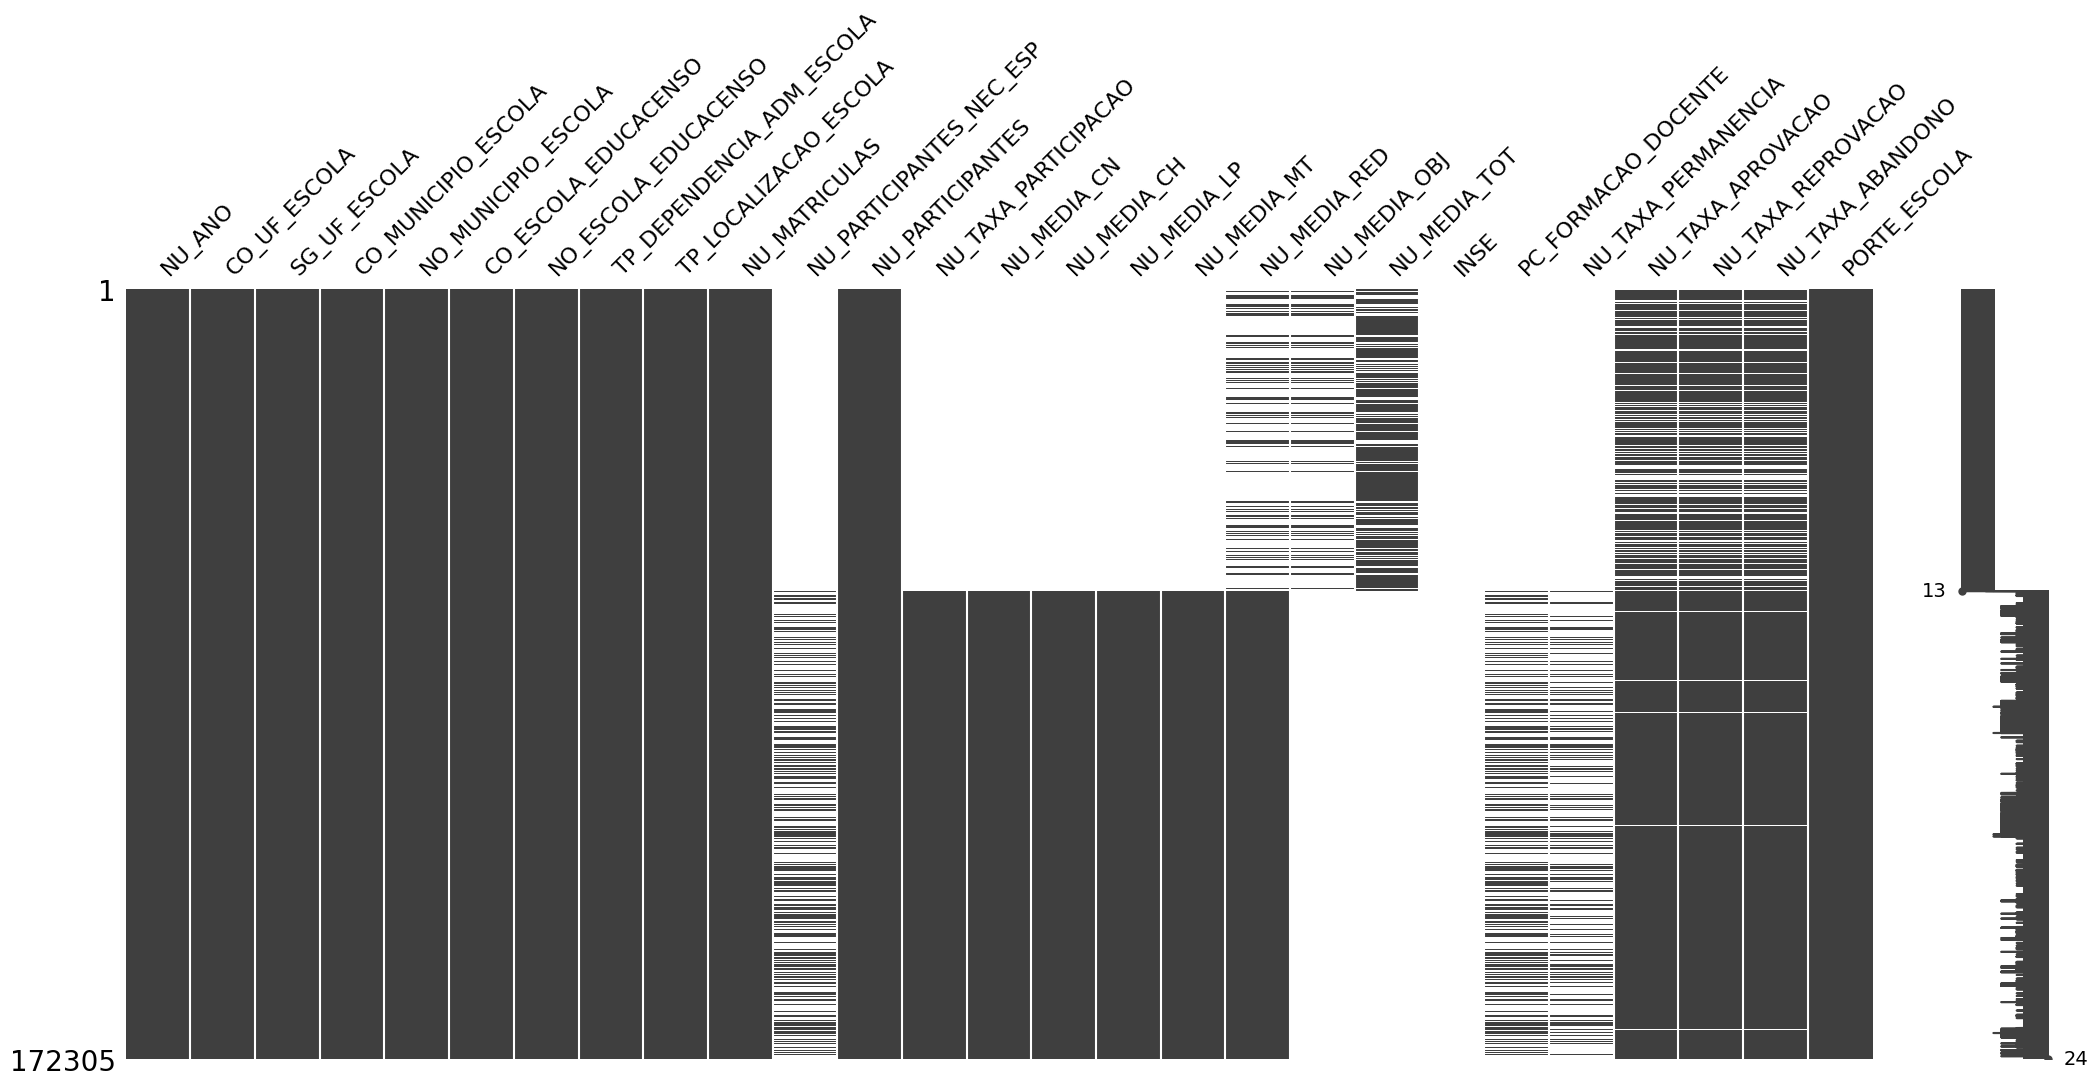

In [117]:
ms.matrix(ds)

Como é possível observar, as médias por matéria só se encontram disponíveis a partir do ano de 2009. Então iremos excluir do dataset os anos de 2005 a 2009. E excluir as colunas NU_PARTICIPANTES_NEC_ESP, NU_MEDIA_OBJ, NU_MEDIA_TOT, INSE, PC_FORMACAO_DOCENTE e
NU_TAXA_PERMANENCIA, que apresentam valores zero.



(104687, 21)


<Axes: >

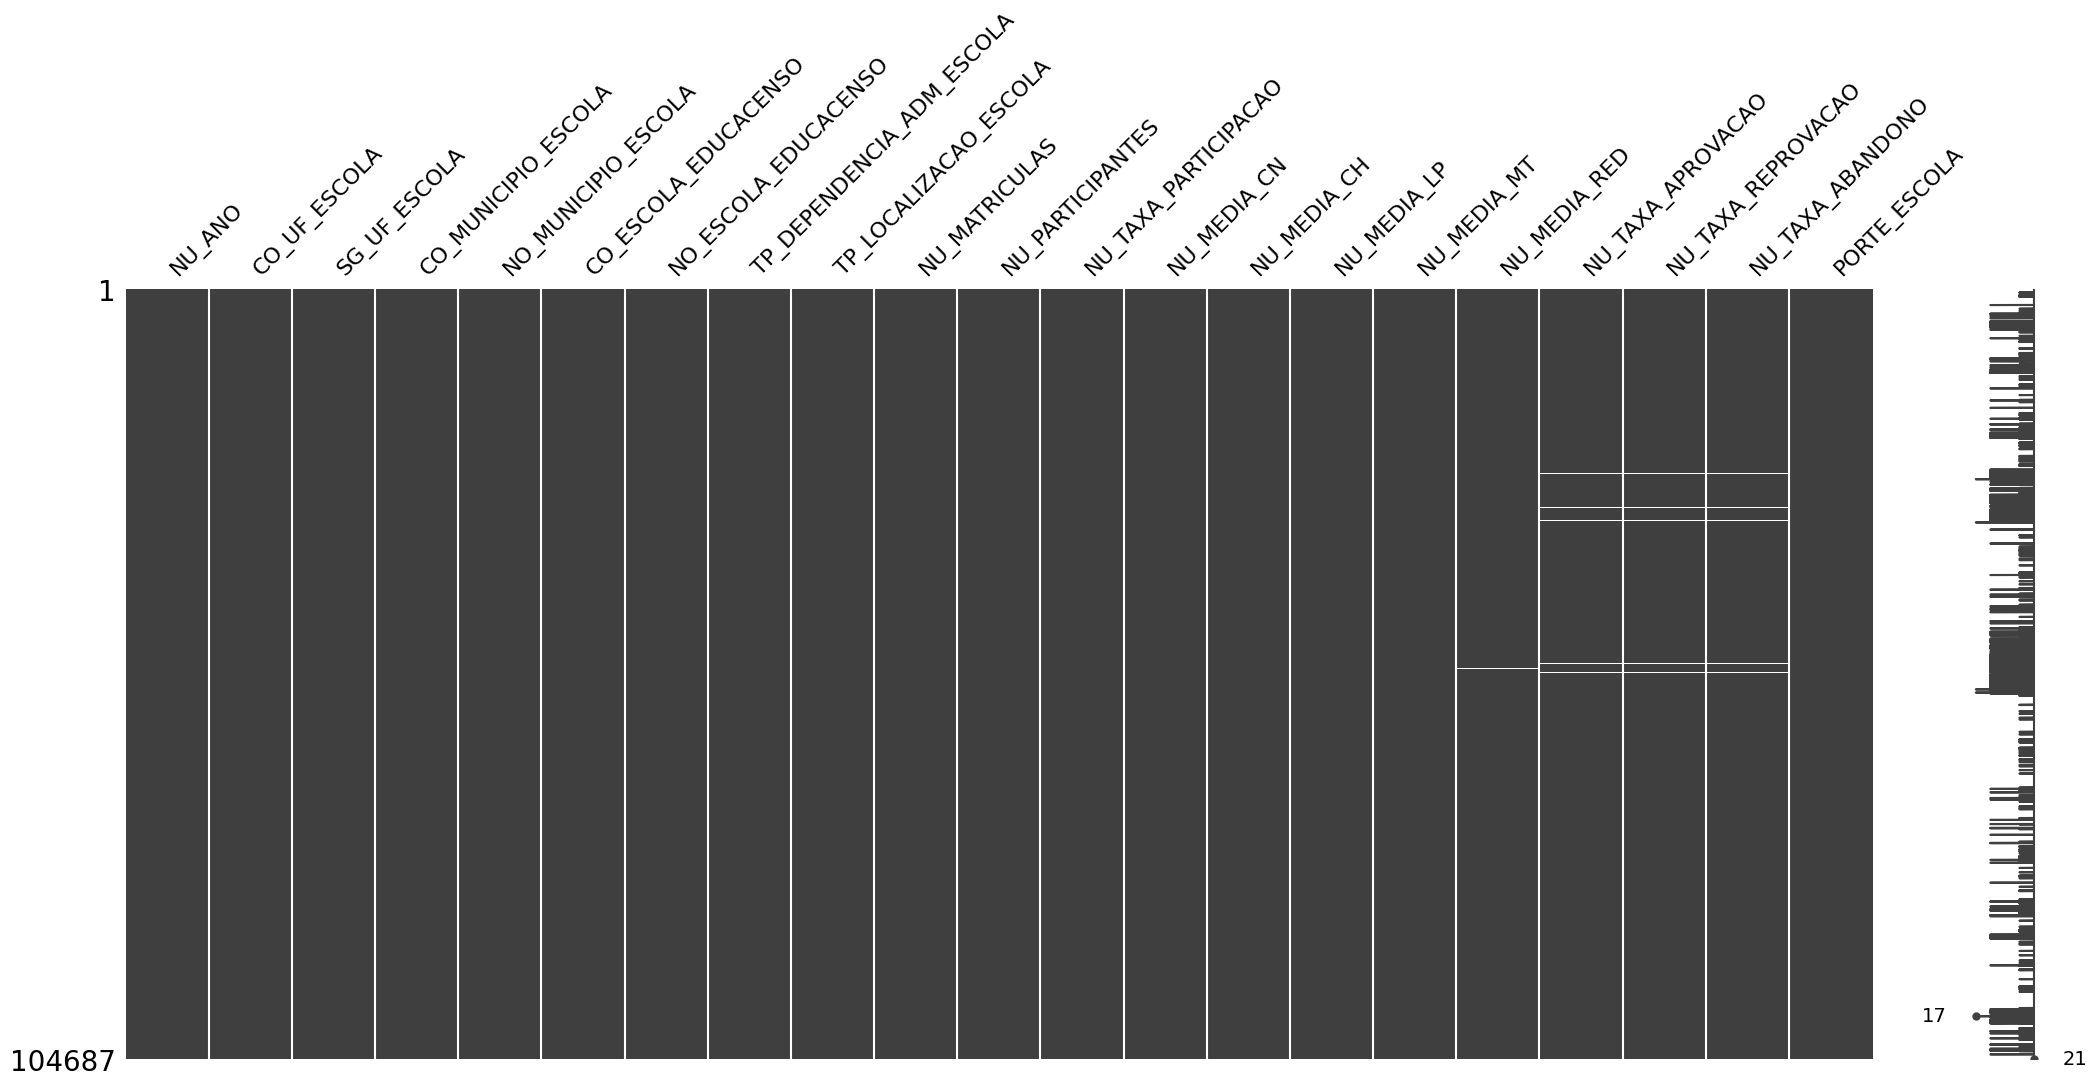

In [118]:
ds['NU_ANO'] = ds['NU_ANO'].apply(pd.to_numeric, errors='coerce')
ds.drop(ds[ds['NU_ANO'] < 2009].index, inplace=True)
ds.drop(['NU_PARTICIPANTES_NEC_ESP', 'NU_MEDIA_OBJ', 'NU_MEDIA_TOT', 'INSE', 'PC_FORMACAO_DOCENTE', 'NU_TAXA_PERMANENCIA'], axis=1, inplace=True)

print(ds.shape)
ms.matrix(ds)

In [119]:
# função para calcular a média objetiva (somar os valores das médias por área de conhecimento) e calcular a média total (acrescentando à média objetiva a média de redação) )
def calcula_media(row):
    return ((row['NU_MEDIA_CN'] + row['NU_MEDIA_CH'] + row['NU_MEDIA_LP'] + row['NU_MEDIA_MT'])/4)+row['NU_MEDIA_RED']


# aplicar a função em cada linha do DataSet e adicionar o resultado como uma nova coluna
ds['MEDIA_TOTAL'] = ds.apply(calcula_media, axis=1)
                             
display(ds.head(5))


,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA,MEDIA_TOTAL
67619,2014,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,145,136,93.79,604.88,647.29,592.34,629.14,718.53,95.4,4.6,0.0,Maior que 90 alunos,1336.9425
67620,2015,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,137,130,94.89,591.64,652.34,604.53,627.66,732.00,96.1,3.9,0.0,Maior que 90 alunos,1351.0425
67621,2009,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,144,65.50,622.92,624.16,598.73,592.42,707.29,95.5,4.5,0.0,Maior que 90 alunos,1316.8475
67622,2011,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,200,158,79.00,589.18,587.03,617.56,683.44,649.24,92.4,7.3,0.3,Maior que 90 alunos,1268.5425
67623,2012,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,272,252,92.65,587.74,624.71,576.79,660.32,653.02,95.0,4.9,0.1,Maior que 90 alunos,1265.4100


In [122]:
ds_agrupado = ds.groupby('CO_ESCOLA_EDUCACENSO')
ds_agrupado.head()

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA,MEDIA_TOTAL
67619,2014,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,145,136,93.79,604.88,647.29,592.34,629.14,718.53,95.4,4.6,0.0,Maior que 90 alunos,1336.9425
67620,2015,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,137,130,94.89,591.64,652.34,604.53,627.66,732.00,96.1,3.9,0.0,Maior que 90 alunos,1351.0425
67621,2009,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,144,65.50,622.92,624.16,598.73,592.42,707.29,95.5,4.5,0.0,Maior que 90 alunos,1316.8475
67622,2011,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,200,158,79.00,589.18,587.03,617.56,683.44,649.24,92.4,7.3,0.3,Maior que 90 alunos,1268.5425
67623,2012,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,272,252,92.65,587.74,624.71,576.79,660.32,653.02,95.0,4.9,0.1,Maior que 90 alunos,1265.4100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172300,2012,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,141,118,83.69,436.96,492.55,475.59,453.56,480.17,61.3,24.9,13.8,Maior que 90 alunos,944.8350
172301,2013,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,213,147,69.01,445.09,496.43,477.62,483.17,503.86,83.1,9.1,7.8,Maior que 90 alunos,979.4375
172302,2014,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,138,100,72.46,471.92,542.91,500.61,453.76,470.20,81.2,17.5,1.3,Maior que 90 alunos,962.5000
172304,2014,53,DF,5300108,Brasília,53082001,COL IMPACTO,4,1,12,10,83.33,516.09,560.65,546.61,513.08,482.00,91.4,8.6,0.0,De 1 a 30 alunos,1016.1075


## 3. Análise Exploratória de Dados
O processo de análise exploratória irá envolver 3 fases: 

- Análise descritivas do dataset, onde serão levantadas suas dimensões, tipos de variáveis e estatísticas de frequência daqueles numerais.

- Em seguida começaremos a análise pelas visualizações unimodais, onde avaliaremos o comportamento das variáveis numéricas, sua distribuição estatística




### 3.1. Estatísticas Descritivas
Nesta primeira etapa será realizada uma análise descritiva do dataset, onde serão determinadas as suas dimensões, tipos de variáveis (qualitativas e quantitativas), além de uma primeira avaliação estatísticas dos dados numéricos.

O dataset agora possui 21 colunas com 104688 linhas. 





In [123]:
# exibindo um sumário estatístico
display(ds.describe())

,NU_ANO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,MEDIA_TOTAL
count,104687.000000,104687.000000,104687.000000,104687.000000,104687.000000,104687.000000,104687.000000,104687.000000,104687.000000,104687.000000,104307.000000,103852.000000,103852.000000,103852.000000,104307.000000
mean,2011.891161,2.730511,1.036518,94.848023,56.168349,64.443924,490.912972,531.750703,509.955970,512.976072,557.053463,84.813194,9.625480,5.561327,1068.582276
std,2.112184,0.982292,0.187577,93.338411,58.151453,23.221287,51.818260,55.280886,48.105396,73.124845,79.426922,12.341646,8.306572,7.477012,124.460969
min,2009.000000,1.000000,1.000000,0.000000,10.000000,2.000000,324.850000,357.870000,319.260000,357.980000,141.880000,0.000000,0.000000,0.000000,498.497500
25%,2010.000000,2.000000,1.000000,32.000000,20.000000,51.350000,453.630000,492.420000,475.640000,458.560000,505.095000,77.100000,3.400000,0.000000,983.175000
50%,2012.000000,2.000000,1.000000,64.000000,36.000000,65.910000,478.000000,527.790000,504.870000,494.300000,558.330000,87.700000,7.500000,2.000000,1054.270000
75%,2014.000000,4.000000,1.000000,124.000000,70.000000,83.720000,521.210000,567.950000,542.930000,554.610000,608.820000,94.900000,13.800000,9.000000,1147.227500
max,2015.000000,4.000000,2.000000,1374.000000,992.000000,100.000000,755.160000,758.040000,712.350000,873.650000,930.000000,100.000000,100.000000,100.000000,1615.245000



---


**Percepções** 

**Análise descritiva**

•	Temos um dataset com 21 atributos com 104687 instâncias.

**Análise estatística**

•	A pontuação média é  de 1068 pontos, com valores mínimo de 498 e máximo de 1615. A mediana é cerca de 1055 e desvio padrão de cerca de 124



---



### 3.2. Visualizações Unimodais

Para avaliar a distribuição de frequências das variáveis iremos utilizar gráficos de histograma e de densidade para cada um destes atributos numéricos do dataset.

Utilizaremos ainda o gráfico de boxplot para verificar a existência de outliers.


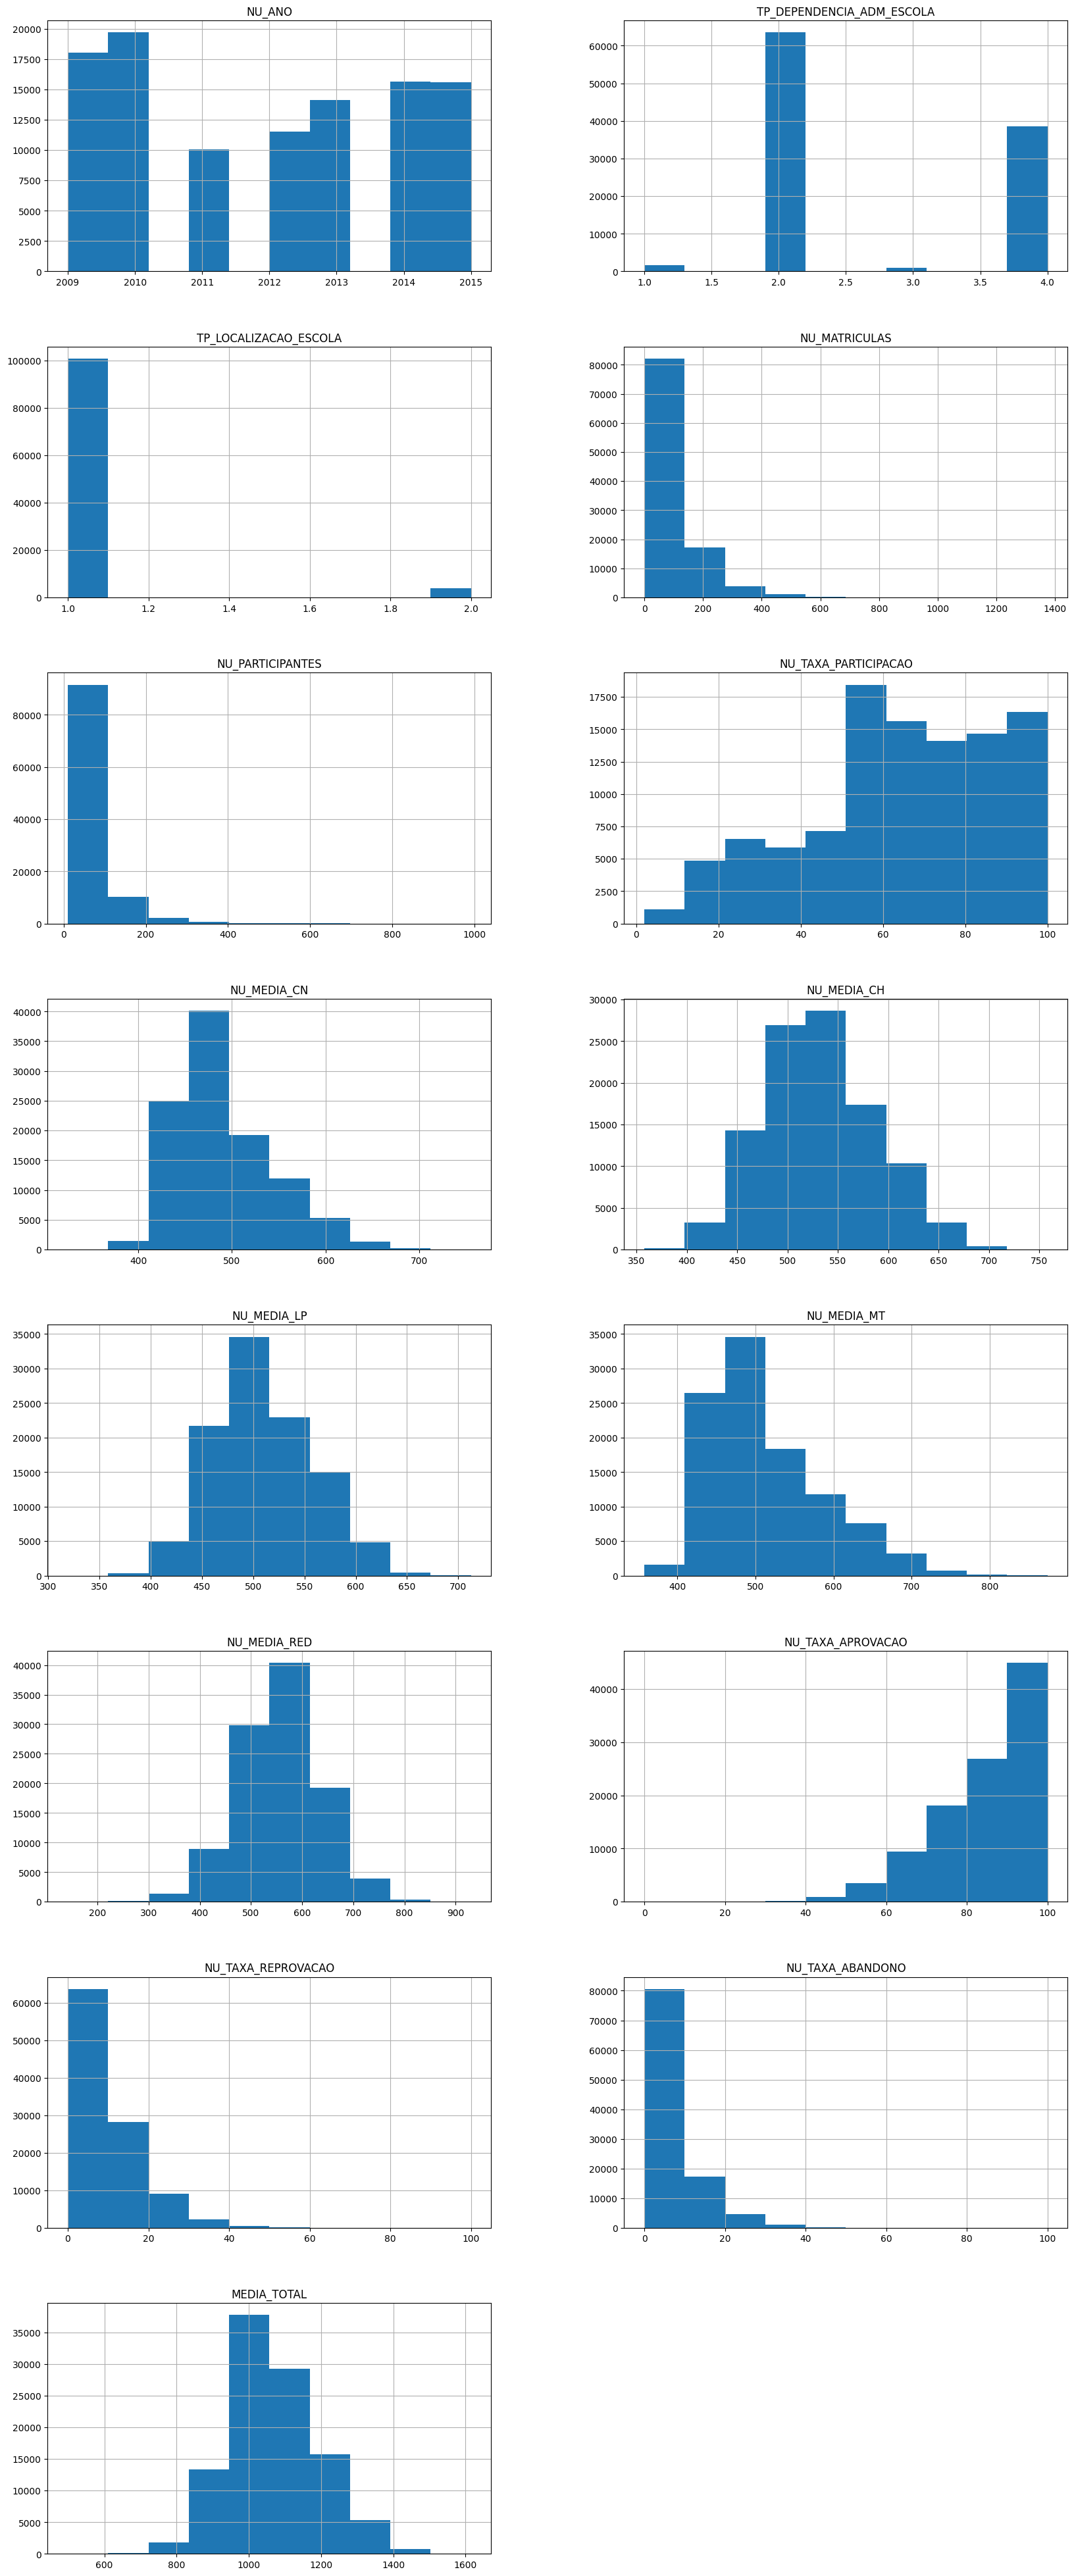

In [133]:
# Histograma
ds.hist(figsize=(20,50), layout=(8,2))
plt.show()


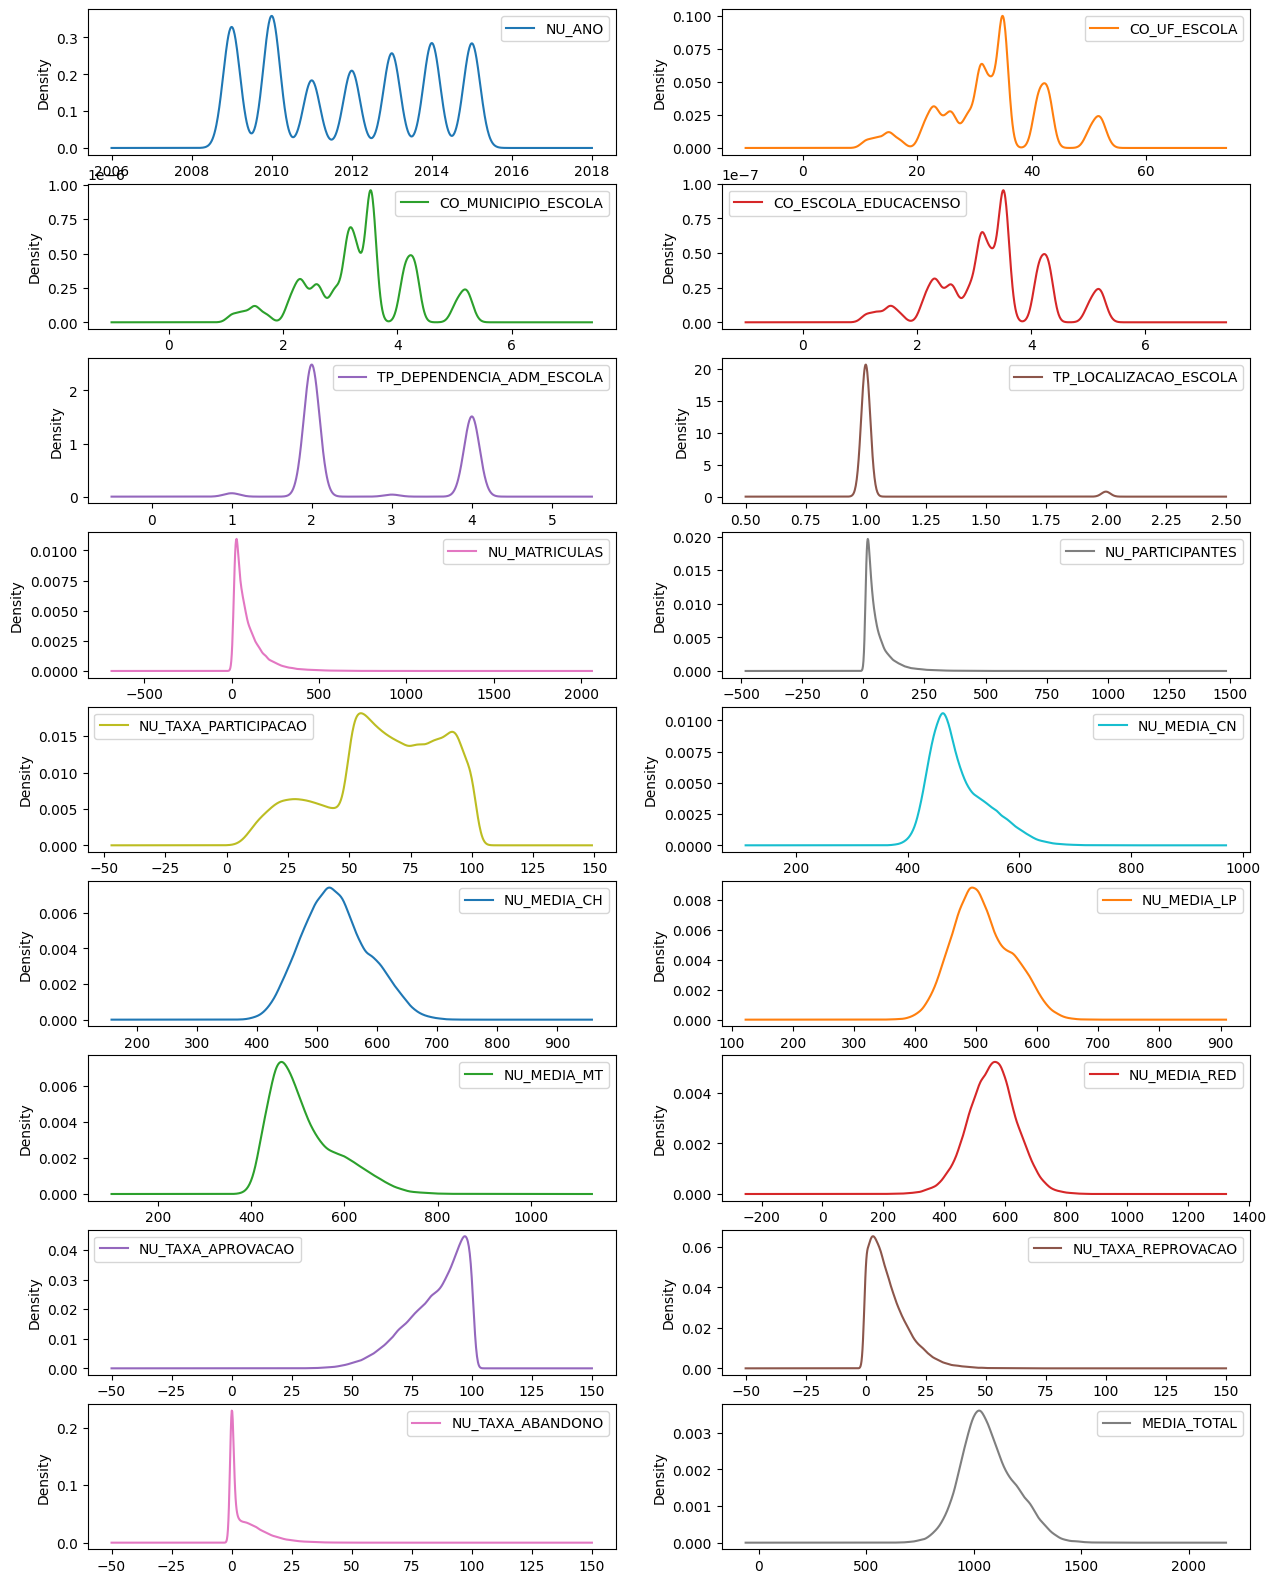

In [137]:
# Density Plot
ds.plot(kind = 'density', subplots = True, layout = (9,2), sharex = False, figsize = (15,20))
plt.show()

Os gráficos de densidade apresentam um comportamento unimodal em ambas variáveis, sem skew.

**Determinando os Outliers**

Em seguida, utilizarei gráficos de boxplot para visualmente observar a existencia de outliers nas variáveis IMDB e Duração

Outliers de IMDB: 9
Outliers de Duracao: 75


<Figure size 1000x1500 with 0 Axes>

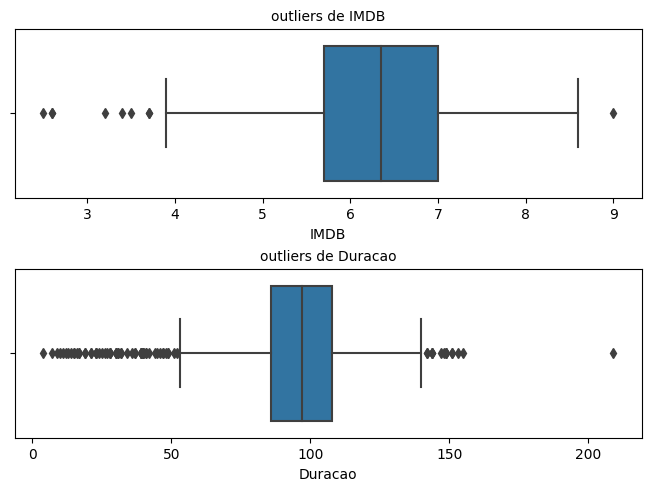

In [ ]:
imprime2graficosboxplot('IMDB', 'Duracao')

O gráfico de Boxplot apresenta outliers em ambas variáveis: 9 em IMDB, e 75 em Duracao

---

**Resumo das percepções da análise da visualização Unimodal:**

- Os gráficos de histograma e densidade mostram as variáveis IMDB e Duracao apresentando um comportamento aproximado de uma curva normal.

- Os gráficos de densidade mostram ainda comportamento unimodal para cada variável e, também não apresentam skew. 

- O valor das medianas das variáveis é próximo a média, apesar dos outliers presentes. A média do tempo de duração é 94 minutos e a mediana 97, enquanto a média do IMDB é 6,3 e a mediana 6,4.

- Existem outliers em ambas as variáveis: 9 em IMDB, e 75 em Duração, mas que nao afetam muito a média, pois a mediana está bem próxima. 








---

### 3.3. Visualizações Multimodais
Nesta etapa objetivo é de buscar uma relação entre as variáveis preditoras com a variável alvo "IMDB".

Iniciaremos com o estudo de correlação entre a variável numérica Duracao com a variável IMDB. 

Em seguida interessa-nos avaliar a existência de um possível relacionamento entre as variáveis quantitativas Premiere, Linguagem e Genero com a variável IMDB.


**Estudo de correlação**

Iniciarei com o estudo da correlação da variável numérica Duracao com a variável alvo IMDB. 


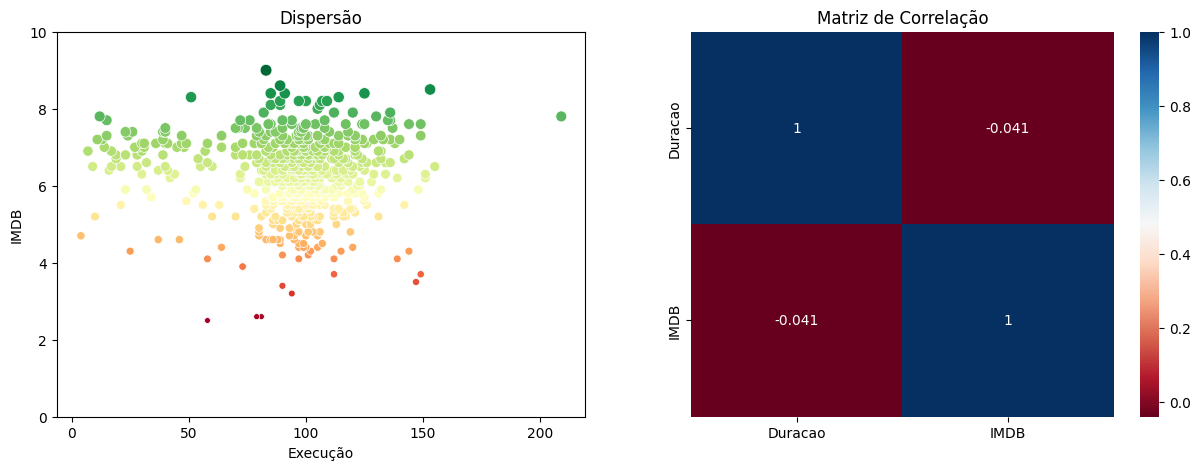

In [ ]:
plt.figure(figsize= (15, 5))

#grafico de dispersão entre as variaveis IMDB  e Duração
plt.subplot(1, 2, 1)

ax = sns.scatterplot(data= ds, 
                x= 'Duracao', 
                y= 'IMDB', 
                hue= 'IMDB', 
                size= 'IMDB',
                palette= 'RdYlGn',
                legend= False)

ax.set_ylim((0, 10))
plt.title('Dispersão', size= 12)
plt.xlabel('Execução', size= 10)
plt.ylabel('IMDB', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)

# Matriz de Correlação entre as variaveis IMDB Score e Runtime
plt.subplot(1, 2, 2)

plt.title('Matriz de Correlação', size= 12)
sns.heatmap(ds.corr(), annot=True, cmap='RdBu');

#sns.histplot(ds['Runtime'])
#plt.title('Runtime Distribuition', size= 20)
#plt.xlabel('Runtime', size= 17)
#plt.yticks(size= 15)
#plt.xticks(size= 15)

plt.show()


---


**Percepção da análise Multimodal de correlação e dispersão**

•	Não há correlação aparente entre o tempo de exibição (Duracao) e a avaliação obtida (IMDB).

•	Avaliando o relacionamento no gráfico de dispersão, aparentemente as maiores notas IMDB se situam em volta da média de duração (90 minutos), com até uma variação correspondente a um desvio padrão de distância (30 minutos).

•	Um outro achado é que aparentemente os filmes com menor tempo de duração, abaixo de 1 desvio padrão (cerca de menos de 60 minutos) tem avaliações mais altas em comparação a média.








---





---
**Estudo de demais relacionamentos**

Continuando a análise exploratória, a ideia a seguir é analisar o comportamento das variáveis “Premiere”, “Linguagem” e “Genero” com relação a variável alvo IMDB.

Primeiramente, para uma melhor análise do possível efeito da variável quantitativa “Premiere” na pontuação (IMDB) é interessante desmembrá-la em novas variáveis numéricas categóricas: "Data", “Ano”, “Mes” e “DiaSemana”.


---



In [ ]:
# Desmembrando Premiere em Data, Ano, mes e dia da semana
ds['Data'] = pd.to_datetime(ds.Premiere)
ds['DiaSemana'] = ds['Data'].dt.day_of_week # dia da semana com segunda-feira=0, domingo=6.
ds['Mes'] = ds['Data'].dt.month
ds['Ano'] = ds['Data'].dt.year 

# Conferindo a tabela - Mostrando 5 linhas com novas variáveis
ds.head()

,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem,Data,DiaSemana,Mes,Ano
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,0,8,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,4,8,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,3,12,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,4,1,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,4,10,2020


In [ ]:
# Mostrando as novas informações sobre as variáveis do dataset
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Titulo     584 non-null    object        
 1   Genero     584 non-null    object        
 2   Premiere   584 non-null    object        
 3   Duracao    584 non-null    int64         
 4   IMDB       584 non-null    float64       
 5   Linguagem  584 non-null    object        
 6   Data       584 non-null    datetime64[ns]
 7   DiaSemana  584 non-null    int64         
 8   Mes        584 non-null    int64         
 9   Ano        584 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 45.8+ KB
None


Confirmando apenas que estas novas variáveis numéricas derivadas de "premiere" são categóricas.
Em seguida, inicio a análise pela variável "Premiere"

Em seguida, inicio a análise pela variável "Premiere"

**i. Relação entre a Data do lançamento (Premiere) e a avaliação (IMDB) obtida.**

Nesta primeira etapa da análise das variáveis quantitativas, será avaliada a relação entre a data de lançamento e a sua avaliação obtida. Para isto as questões a responder aqui serão:

1.	Em que ano houve uma maior quantidade de lançamentos de filmes originais?
2.	Em qual mês houve maior número de lançamentos de filmes originais?
3.	Qual dia de semana há uma preferência por lançamentos?
4.	Mês de lançamento influencia a avaliação?
5.	Dia da semana de lançamento influencia a avaliação?



A primeira etapa envolverá entender a distribuição dos lançamentos no tempo (ano, mes e dia de semana) e a respectiva pontuação IMDB

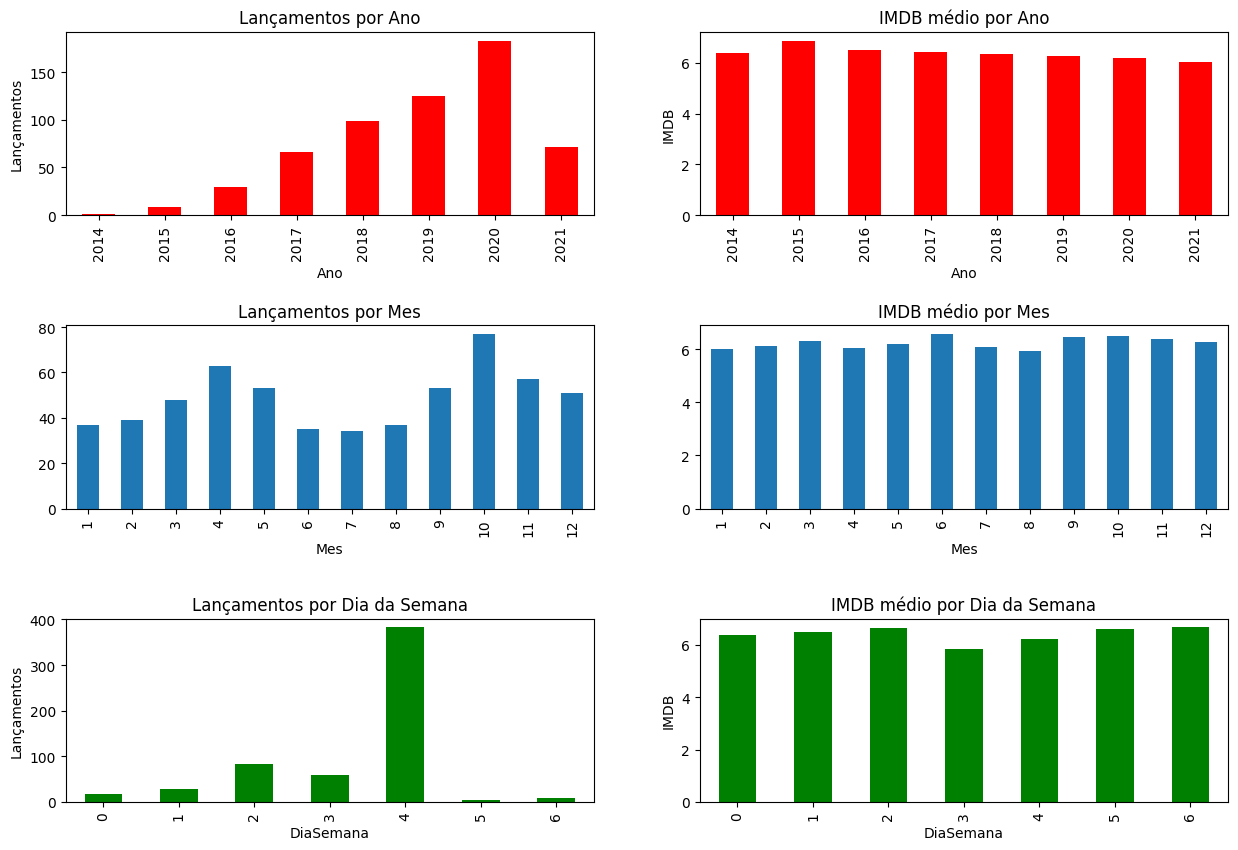

In [ ]:
# preparando os gráficos
plt.figure(figsize= (15, 10))

# gráfico de quantidade por ano
plt.subplot(3, 2, 1)
plt.title('Lançamentos por Ano', size= 12)
plt.ylabel('Lançamentos', size= 10)
plt.xlabel('ano', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
ds.groupby("Ano")["Titulo"].count().plot(kind = "bar", color='red')

# gráfico de IMDB por ano
plt.subplot(3, 2, 2)
plt.title('IMDB médio por Ano', size= 12)
plt.ylabel('IMDB', size= 10)
plt.xlabel('ano', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
ds.groupby("Ano")["IMDB"].mean().plot(kind = "bar", color='red')

# gráfico de quantidade por mes
plt.subplot(3, 2, 3)
plt.title('Lançamentos por Mes', size= 12)
#plt.ylabel('Lançamentos', size= 10)
plt.xlabel('mes', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
ds.groupby("Mes")["Titulo"].count().plot(kind = "bar")

# gráfico de IMDB por mes
plt.subplot(3, 2, 4)
plt.title('IMDB médio por Mes', size= 12)
#plt.ylabel('Lançamentos', size= 10)
plt.xlabel('mes', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
ds.groupby("Mes")["IMDB"].mean().plot(kind = "bar")

# gráfico de quantidade por dia de semana
plt.subplot(3, 2, 5)
plt.title('Lançamentos por Dia da Semana', size= 12)
plt.ylabel('Lançamentos', size= 10)
plt.xlabel('Dia da Semana', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
#label_diasem = ['domingo','2af','3af','4af','5af','6af','sábado']
ds.groupby("DiaSemana")["Titulo"].count().plot(kind = "bar", color='green')

# gráfico de IMDB por dia de semana
plt.subplot(3, 2, 6)
plt.title('IMDB médio por Dia da Semana', size= 12)
plt.ylabel('IMDB', size= 10)
plt.xlabel('Dia da Semana', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
#label_diasem = ['domingo','2af','3af','4af','5af','6af','sábado']
ds.groupby("DiaSemana")["IMDB"].mean().plot(kind = "bar", color='green')

# apresntando os gráficos
plt.subplots_adjust(hspace=0.6);
plt.show()

Nesta análise temos 3 duplas de gráficos, analisando a quantidade de títulos lançados e a pontuação IMDB por determinado período.

- Ano
  
  Existe uma tendência de aumento de lançamento de títulos com o passar dos anos desde 2014. 

  2021 é um ano incompleto pois o dataset só contém dados até 01/06/2021, conforme descrito na definição do problema.

  Existe uma leve tendência de diminuição da pontuação média com o passar dos anos desde 2014. 

- Mes

  Meses com maiores lançamentos foram abril e outubro

  Não há variação significativa na pontuação nos diversos meses do ano
- DiaSemana
 
 Existe uma forte tendência de lançamentos na 6a feira
  
  Não há variação significativa na pontuação nos diversos dias da semana, especialmente por termos uma concentração de lançamentos em um dia



In [ ]:
tabela_por_titulo_imdb('DiaSemana',7, 2)

,DiaSemana,IMDB
6,6,6.677778
2,2,6.630488
5,5,6.620000
1,1,6.496552
0,0,6.370588
4,4,6.224804
3,3,5.847458




Nestas top 7 ocorrências de DiaSemana por média de IMDb temos valor máximo 6.7 e minimo de 5.8


In [ ]:
tabela_por_titulo_imdb('Ano',8, 3)

,Ano,IMDB
1,2015,6.877778
2,2016,6.513333
3,2017,6.422727
0,2014,6.400000
4,2018,6.360606
5,2019,6.259200
6,2020,6.195082
7,2021,6.046479




Nestas 8 ocorrências de Ano por média de IMDb temos valor máximo 6.9 e minimo de 6.0


In [ ]:
tabela_por_titulo_imdb('Mes',12, 3)

,Mes,IMDB
5,6,6.582857
9,10,6.522078
8,9,6.481132
10,11,6.398246
2,3,6.322917
11,12,6.274510
4,5,6.213208
1,2,6.117949
6,7,6.091176
3,4,6.049206




Nestas 12 ocorrências de Mes por média de IMDb temos valor máximo 6.6 e minimo de 6.0




---

**Respostas às perguntas:**
1. Em que ano houve um maior lançamentos de filmes originais?

  R: O ano com maior número de lançamentos no periodo avaliado foi 2020 no periodo estudado 

2. Em qual mes do ano ocorre um maior número de lançamentos de filmes originais?

  R: Existe uma tendencia de lançamentos nos meses de abril e outubro no periodo estudado 

3. Qual dia de semana há uma preferencia por lançamentos?

  R: Existe uma tendência de lançamentos na 6a feira no periodo estudado 

**Outras Conclusões e Percepções**

* Observa-se uma tendência quase linear de aumento de lançamentos de originais, que foi quebrada em 2021, em função de não termos o ano completo disponível no dataset.

*   Observa-se uma leve tendência de queda na pontuação média anual dos lançamentos desde 2015, inversamente proporcional a quantidade de lançamentos, o que pode sugerir uma estratégia da Netflix em privilegiar a quantidade em detrimento à qualidade dos lançamentos.

*    Não há variação significativa na pontuação nos diversos meses do ano nem nos diversos dias de semana








---



**ii. Análise da variável "Genero"**

Nesta próxima etapa da análise, será avaliada a influência da variável "Genero" na quantidade de lançamentos realizados e na pontuação (IMDB) obtida. Para isto as questões a responder aqui serão:
1.	Quantos e quais os principais gêneros?
2.	Quais gêneros de filmes foram os mais lançados?
3.	Quais gêneros de filmes tem melhor pontuação dentre os mais lançados?
4.	Quais gêneros de filmes tem melhor pontuação?


Primeiramente vamos avaliar o universo que será analisado, buscado a quantidade de diferentes "Generos" empregados nos filmes lançados

In [ ]:
generos_df = conta_var('Genero')
print(f'Dimensões do dataset: {ds.shape}')

Existem 115 diferentes Genero
Dimensões do dataset: (584, 10)


Existem 115 diferentes ocorrências de "Genero" nos filmes lançados. Um gráfico com todos eles seria ilegível, assim vou trabalhar com um subconjunto de generos mais lançados.

Passando agora a analisar a distribuição destes gêneros, em função destes lançamentos. Para termos uma visão geral desta variável "Genero", vamos selecionar inicialmente os 50 maiores gêneros lançados, a fim de poder analisar o gráfico gerado

<Figure size 1500x1000 with 0 Axes>

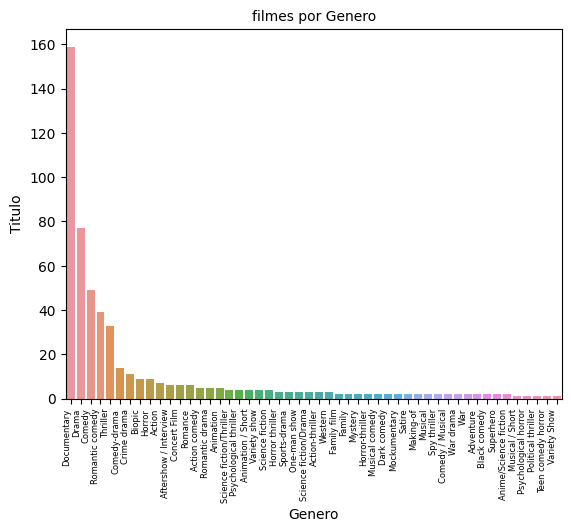

In [ ]:
# pegando 50 maiores ocorrencias para deixar o grafico legível
generos_df=generos_df[0:50]

plt.figure(figsize=(15,10))
fig, ax = plt.subplots(1,1)

ax.set_title('filmes por Genero', fontsize = 10)
ax.set_xlabel('Lançamentos', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=6)

sns.barplot(y = 'Titulo', x = 'Genero', data = generos_df, ax = ax)

fig.show()

O gráfico mostra uma distribuição próxima a exponencial do lançamento de titulos por genero, apresentando uma maior concentração nos 15 primeiros.

In [ ]:
tabela_por_titulo_imdb('Genero',15, 1)

Genero por Titulos


,Genero,Titulo
45,Documentary,159
46,Drama,77
32,Comedy,49
81,Romantic comedy,39
106,Thriller,33
36,Comedy-drama,14
41,Crime drama,11
26,Biopic,9
60,Horror,9
0,Action,7




Nestas top 15 ocorrências de Genero temos 435 títulos
Esta amostra equivale a 74.5% do total lançado


Observa-se no gráfico uma distribuição de ocorrências próxima a exponencial. 

Os 15 melhores colocados somam 435 títulos, o que corresponde a cerca de 75% do total lançado. Assim, para esta próxima análise vou trabalhar com esta amostra de 15.

A seguir listo os gráficos de quantidade de títulos e pontuação média, e logo em seuida uma tabela com os valores da pontuação média.

<Figure size 1500x2000 with 0 Axes>

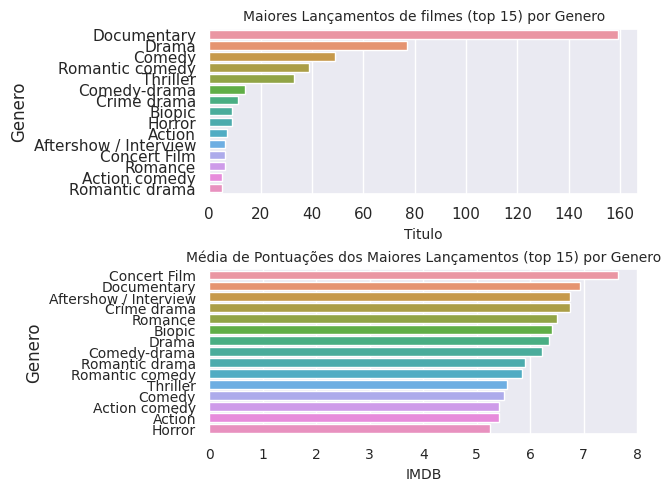

In [ ]:
# vamos trabalhar com os top 
# analisa Genero x IMDB top 
imprime_por_titulo_imdb('Genero',15)

In [ ]:
tabela_por_titulo_imdb('Genero',15, 2)

,Genero,IMDB
40,Concert Film,7.633333
45,Documentary,6.936478
10,Aftershow / Interview,6.750000
41,Crime drama,6.745455
79,Romance,6.500000
26,Biopic,6.400000
46,Drama,6.342857
36,Comedy-drama,6.214286
84,Romantic drama,5.900000
81,Romantic comedy,5.848718




Nestas top 15 ocorrências de Genero por média de IMDb temos valor máximo 7.6 e minimo de 5.3


A distribuição da pontuação pelos 15 gêneros com maior quantidade de lançamentos é bem significativa. O intervalo de pontuação tem um valor máximo 7.6 e mínimo de 5.3.

Os gêneros Aftershow/interview e Concert film aparecem com destaque na pontuação, contudo apresentam um número baixo de lançamentos, o que pode prejudicar o valor médio se houver algum outlier presente. 

Em função da quantidade de títulos avaliada para os 5 primeiros gêneros, considero que o valor médio da pontuação representa adequadamente sua pontuação.


Continuando a análise, serão analisadas agora as melhores médias de avaliação absolutas, isto é, independentemente do número de filmes lançados.

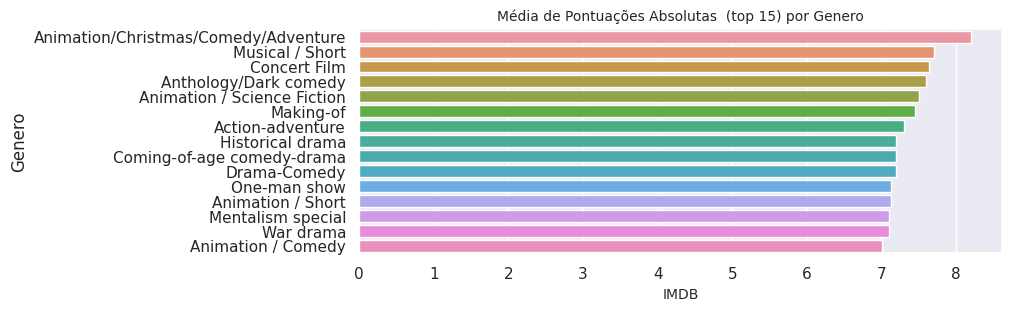

In [ ]:
genero_top=imprime_groupby_IMDB('Genero', 15)

In [ ]:
tabela_por_titulo_imdb('Genero',15, 3)

,Genero,IMDB
17,Animation/Christmas/Comedy/Adventure,8.200000
70,Musical / Short,7.700000
40,Concert Film,7.633333
24,Anthology/Dark comedy,7.600000
15,Animation / Science Fiction,7.500000
66,Making-of,7.450000
3,Action-adventure,7.300000
58,Historical drama,7.200000
39,Coming-of-age comedy-drama,7.200000
48,Drama-Comedy,7.200000




Nestas 15 ocorrências de Genero por média de IMDb temos valor máximo 8.2 e minimo de 7.0


As pontuações médias são mais altas do que aquelas dos maiores lançamentos, contudo é necessário avaliar se a amostra é significativa.

Vamos ver a quantidade de lançamentos para estes gêneros.


In [ ]:
tabela_por_titulo_imdb('Genero',15, 4)

,Genero,Titulo
40,Concert Film,6
16,Animation / Short,4
74,One-man show,3
66,Making-of,2
111,War drama,2
70,Musical / Short,1
67,Mentalism special,1
24,Anthology/Dark comedy,1
17,Animation/Christmas/Comedy/Adventure,1
15,Animation / Science Fiction,1


Observa-se que a amostra destas gêneros mais bem pontuados é muito baixa (muitos deles com apenas 1 lançamento). Desta forma, irei me concentrar naqueles gêneros com mais títulos lançados.  


---



Vamos agora realizar um drill-down naquels gênero mais lançados para buscar alguma tendência.

Analisando mais detalhadamente os Top 5 gêneros mais lançados e sua pontuação

              Genero   Ano      IMDB
78       Documentary  2015  7.316667
79       Documentary  2016  7.266667
83       Documentary  2020  7.171795
80       Documentary  2017  7.068182
81       Documentary  2018  6.940000
82       Documentary  2019  6.685000
87             Drama  2018  6.670000
86             Drama  2017  6.633333
90             Drama  2021  6.533333
77       Documentary  2014  6.400000
84       Documentary  2021  6.378571
88             Drama  2019  6.335714
143  Romantic comedy  2018  6.158333
89             Drama  2020  6.055556
85             Drama  2016  6.050000
183         Thriller  2018  5.900000
144  Romantic comedy  2019  5.871429
142  Romantic comedy  2017  5.800000
185         Thriller  2020  5.666667
145  Romantic comedy  2020  5.660000
49            Comedy  2018  5.650000
184         Thriller  2019  5.640000
47            Comedy  2016  5.600000
146  Romantic comedy  2021  5.600000
51            Comedy  2020  5.566667
50            Comedy  2019  5.509091
4

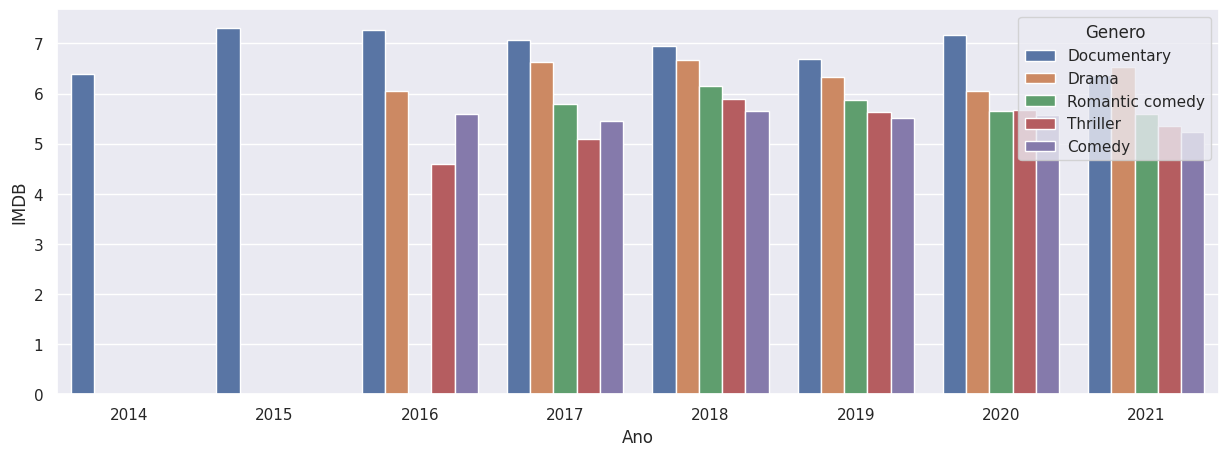

In [ ]:
# preparando os gráficos
plt.figure(figsize= (15, 5))

# media geral de pontuação agrupada por genero e ano
avg_rating_df = ds.groupby(['Genero','Ano'], as_index = False)['IMDB'].mean().sort_values('IMDB', ascending=False)
# Principais generos
top_df = ds.groupby(['Genero'], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
top_df = top_df[0:5] # principais generos

# restringindo aos principais gerenos
avg_rating_top_df = avg_rating_df[(avg_rating_df['Genero'].isin(top_df['Genero']) == True)]
print(avg_rating_top_df )
sns.barplot(data=avg_rating_top_df, x="Ano", y="IMDB", hue="Genero")

# apresntando os gráficos
plt.subplots_adjust(hspace=0.6);
plt.show()

Com relação ao gráfico observa-se que:
O gênero Documentary foi o único lançado nos anos de 2014 e 2015, daí uma possível explicação do porquê ele aparecer como o gênero mais lançado. Sua pontuação, depois de uma subida em 2015 veio caindo ao longo dos anos avaliados, mas voltou a subir em 2020. Contudo esta variação foi pequena e não existe uma tendência. 

A mesma análise se aplica ao gênero Drama, lançado inicialmente em 2016, ele tem uma variação de pontuação similar a uma senoide. O interessante é que ele passou o gênero Documentary em 2021.

Os demais gêneros (Romatic comedy, Thriller e Comedy) também não apresentam uma tendência clara.




---


**Resumo das percepções e Respostas envolvendo "Genero":**
1.	Quantos diferentes gêneros existem?

  Existem 115 diferentes gêneros de filmes
2.	Quais gêneros de filmes foram os mais lançados?

  Os gêneros nos 15 maiores lançamentos, que equivale a equivale a 75% do total lançado, que totalizam 435 títulos são Documentary, Drama, Comedy, Romantic comedy, Thriller, Comedy-drama, Crime drama, Biopic, Horror, Action,Aftershow / Interview, Concert Film, Romance, Action comedy, Romantic drama.
 
3.	Quais gêneros de filmes tem melhor avaliação dentre os mais lançados?

  As melhores pontuações entre os 15 mais lançados vão desde 5,26 a 6,94, e são Concert Film, Documentary, Aftershow / Interview,Crime drama, Romance, Biopic, Drama, Comedy-drama, Romantic drama, Romantic comedy, Thriller, Comedy, Action comedy, Action e Horror. 

4.	Quais gêneros de filmes, independentemente da quantidade de lançamentos, tem melhor avaliação?

  Esta análise está prejudicada, pois a maioria destes gêneros tem apenas 1 filme lançado.

**Percepções**

- Apesar das notas dos gêneros mais bem avaliados serem superiores as avaliações dos gêneros utilizados nos 15 maiores lançamentos, elas têm uma baixíssima amostragem de filmes lançados, o que distorce a análise, e por isto não serão considerados.

- O gênero "Documentary" foi o único lançado nos anos de 2014 e 2015, explicando assim sua liderança em quantidade de títulos. Por isto, ele apresenta mais do que o dobro de títulos (159) em comparação ao 2o colocado "Drama" (77), tendo assim um peso alto na média da pontuação geral de cada ano.

- O gênero Drama vem performando bem, porém sem tendência clara. Observa-se que ele ultrapassou o Documentary em 2021.

- Os demais gêneros (Romatic comedy, Thriller e Comedy) também não apresentam uma tendência clara.





---



**iii. Análise da variável "Linguagem"**

Nesta próxima etapa da análise, será avaliada a influência da "linguagem" dos filmes na quantidade de lançamentos realizados e na pontuação obtida. Para isto as questões a responder aqui serão:

1. Quais linguagens mais lançadas?
2. Quais linguagens tem melhor avaliação dentre os maiores lançamentos?
3. Quais linguagens tem melhor avaliação?

In [ ]:
linguagem_df = conta_var('Linguagem')

Existem 38 diferentes Linguagem


Existem 38 diferentes ocorrências de "Linguagem" nos filmes lançados. 

Passando agora a analisar a distribuição destas linguagens, em função destes lançamentos. 

<Figure size 5000x1500 with 0 Axes>

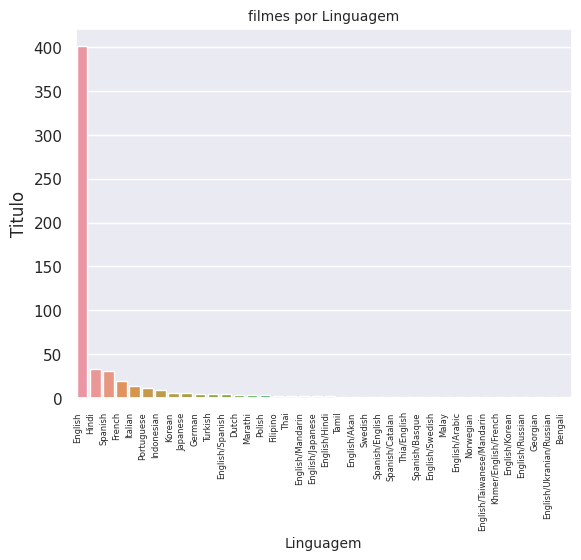

In [ ]:
# visão geral dos Linguagens
plt.figure(figsize=(50,15))
fig, ax = plt.subplots(1,1)

ax.set_title('filmes por Linguagem', fontsize = 10)
ax.set_xlabel('Lançamentos', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=6)

sns.barplot(y = 'Titulo', x = 'Linguagem', data = linguagem_df, ax = ax)

fig.show()

In [ ]:
tabela_por_titulo_imdb('Linguagem',15, 1)

,Linguagem,Titulo
2,English,401
18,Hindi,33
29,Spanish,31
15,French,20
20,Italian,14
28,Portuguese,12
19,Indonesian,9
23,Korean,6
21,Japanese,6
17,German,5




Nestas top 15 ocorrências de Linguagem temos 556 títulos
Esta amostra equivale a 95.2% do total lançado


Observa-se no gráfico uma distribuição de ocorrências próxima a exponencial.

Os 15 melhores colocados somam 556 títulos, o que corresponde a cerca de 95% do total lançado. Assim, para esta próxima análise vou trabalhar com esta amostra de 15.

<Figure size 1500x2000 with 0 Axes>

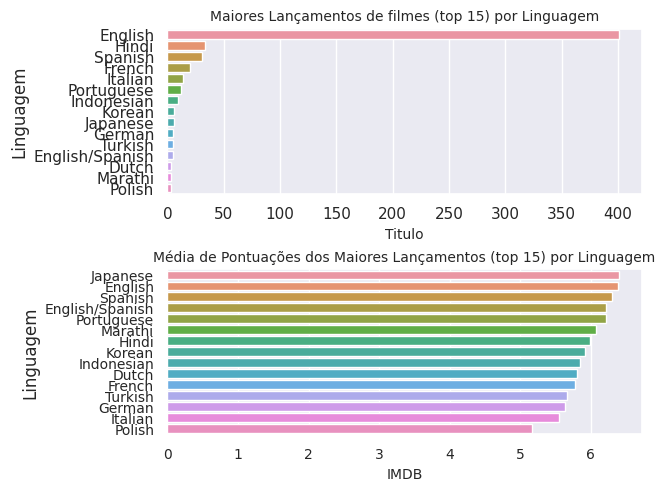

In [ ]:
# vamos trabalhar com os top 15
# analisa Linguagem  x IMDB
imprime_por_titulo_imdb('Linguagem',15)

In [ ]:
tabela_por_titulo_imdb('Linguagem',15, 2)

,Linguagem,IMDB
21,Japanese,6.400000
2,English,6.380050
29,Spanish,6.303226
10,English/Spanish,6.220000
28,Portuguese,6.216667
25,Marathi,6.066667
18,Hindi,5.981818
23,Korean,5.916667
19,Indonesian,5.844444
1,Dutch,5.800000




Nestas top 15 ocorrências de Linguagem por média de IMDb temos valor máximo 6.4 e minimo de 5.2


A distribuição da pontuação pelas 15 diferentes linguagens com maior quantidade de lançamentos é bem significativa. O intervalo de pontuação tem um valor máximo 6,4 e mínimo de 5,2.

Em função da quantidade de títulos avaliada (556) nesta amostra, o valor médio da pontuação representa adequadamente a avaliação do Linguagem.
Continuando a análise, serão analisadas agora as melhores médias de avaliação absolutas, isto é, independentemente do número de filmes lançados.


---



Para uma comparação final, serão analisadas as melhores médias de pontuação por linguagem absolutas, isto é, independentemente do número de filmes lançados.

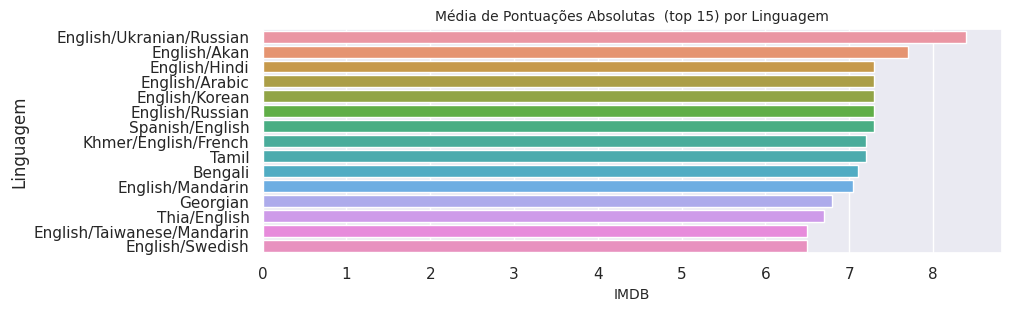

In [ ]:
linguagem_top=imprime_groupby_IMDB('Linguagem', 15)

In [ ]:
tabela_por_titulo_imdb('Linguagem',15, 3)

,Linguagem,IMDB
13,English/Ukranian/Russian,8.40
3,English/Akan,7.70
5,English/Hindi,7.30
4,English/Arabic,7.30
7,English/Korean,7.30
9,English/Russian,7.30
32,Spanish/English,7.30
22,Khmer/English/French,7.20
34,Tamil,7.20
0,Bengali,7.10




Nestas 15 ocorrências de Linguagem por média de IMDb temos valor máximo 8.4 e minimo de 6.5


As pontuações médias são mais altas do que aquelas dos maiores lançamentos, contudo é necessário avaliar se a amostra é significativa.

Vamos ver a quantidade de lançamentos para estas linguagens.

In [ ]:
tabela_por_titulo_imdb('Linguagem',15, 4)

,Linguagem,Titulo
8,English/Mandarin,2
5,English/Hindi,2
34,Tamil,1
3,English/Akan,1
32,Spanish/English,1
36,Thia/English,1
11,English/Swedish,1
4,English/Arabic,1
12,English/Taiwanese/Mandarin,1
22,Khmer/English/French,1


Observa-se que a amostra destas linguagens mais bem pontuadas é muito baixa (a maioria com apenas 1 lançamento). Desta forma, irei me concentrar naquelas lingugens com mais títulos lançados.  


---



Analisando mais detalhadamente as Top 5 linguagens mais lançados e sua pontuação



,Linguagem,Ano,IMDB
63,Spanish,2018,7.700000
62,Spanish,2016,6.800000
33,Hindi,2018,6.575000
4,English,2015,6.542857
5,English,2016,6.444444
6,English,2017,6.401667
3,English,2014,6.400000
66,Spanish,2021,6.400000
8,English,2019,6.398851
9,English,2020,6.394286


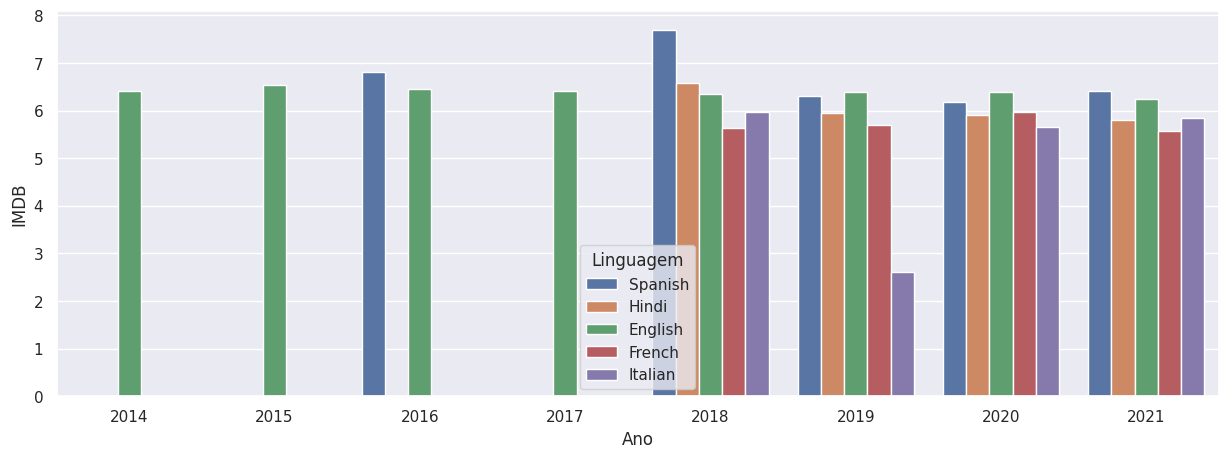

In [ ]:
# preparando os gráficos
plt.figure(figsize= (15, 5))

# media geral de pontuação agrupada por genero e ano
avg_rating_df = ds.groupby(['Linguagem','Ano'], as_index = False)['IMDB'].mean().sort_values('IMDB', ascending=False)
# Principais Linguagem
top_df = ds.groupby(['Linguagem'], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
top_df = top_df[0:5] # principais Linguagem

# restringindo as principais Linguagens
avg_rating_top_df = avg_rating_df[(avg_rating_df['Linguagem'].isin(top_df['Linguagem']) == True)]
display(avg_rating_top_df )
sns.barplot(data=avg_rating_top_df, x="Ano", y="IMDB", hue="Linguagem")

# apresntando os gráficos
plt.subplots_adjust(hspace=0.6);
plt.show()

Com relação ao gráfico observa-se que: 

A linguagem *English* é a mais lançada, sendo a única entre os anos de 2014 e 2017 (a exceção do *Spanish* em 2016), e aparece como uma das linguagens disponíveis nas mais bem avaliadas, sem tendencia clara de evolução da pontuação média.

A linguagem Spanish apareceu pela primeira vez em 2016, quando superou o English, e depois despontou em 2018, sendo a melhor deste ano, e a partir de então obtendo uma pontuação excelente, mantendo-se estável, sem tendência clara de evolução. 

A linguagem *Hindi* despontou em 2018, superando também o English, e depois se estabilizou na 3ª colocação de linguagens mais bem pontuadas.

As demais linguagens (*French* e *Italian*) apareceram a partir de 2018 e apresentam também uma estabilidade sem tendência na sua pontuação. Vale observar que a linguagem Italian teve um desempenho muito ruim em 2019, mas se recuperou nos anos seguintes.





---
**Resposta as Questões envolvendo "Linguagem":**

1. Quais linguagens mais lançadas?

  Existem 38 diferentes lingugens utilizadas nos lançamentos, e a mais usadas em filmes são (em ordem decrescente de quantidade de filmes): English, Hindi, Spanish, French, Italian, Portuguese, Indonesian, Korean, Japanese e German.

2. Quais linguagens tem melhor avaliação dentre os maiores lançamentos?

  Já dentre estas linguagens (mais usadas em filmes), a ordem decrescente das medias das avaliações é: Japanese, English, Spanish, Portuguese, Hindi, Korean, Indonesian, French, German e Italian.

3. Quais linguagens tem melhor avaliação?

  Esta análise está prejudicada, pois a maioria destes lançamentos tem apenas 1 filme lançado.

**Percepções**

- Existe uma preferência pela linguagem English nos lançamentos da Netflix Originals, visto que representaram 401 titulos ou cercade 70% dos lançamentos. Isto pode ser explicado em função desta linguagem ter sido a única entre os anos de 2014 e 2017 (a exceção do Spanish em 2016). Ela se posiciona também como uma das linguagens disponíveis nas mais bem avaliadas, contudo sem tendência clara de evolução da pontuação média. 

- A linguagem *Spanish* apareceu pela primeira vez em 2016, obtendo uma pontuação excelente, mantendo-se estável, sem tendência clara de evolução. 

- Linguagem Hindi despontou em 2018 se estabilizando como linguagens mais bem pontuadas, contudo sem tendência clara de evolução. .  

- Demais linguagens (*French* e *Italian*)  exibem um comportamento estável sem tendência clara.

- Apesar das notas dos linguagens mais bem avaliados serem superiores as avaliações dos gêneros utilizados nos 15 maiores lançamentos, elas têm uma baixíssima amostragem de filmes lançados, o que distorce a análise, e desta forma, foram desconsideradas nesta análise.



---



## 4. Pré-Processamento de dados

Nesta etapa, iremos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, e se necessário transformações.

### 4.1. Tratamento de Missings e Limpeza

Nesta fase de limpeza iremos avaliar a possível ocorrência de nulls e/ou linhas duplicadas, e fazer os devidos ajustes, se necessário.

Iniciando verificando a quantidade de linhas preenchidas por coluna, número de valores nulls e ocorrência de duplicidade


In [ ]:
# Checando número de valores nulls nas colunas
print(f'\n*** Valores Nulos ***')
print(ds.isnull().sum())
print(f'\n*** Linhas duplicadas ***')
print(ds.duplicated().sum())


*** Valores Nulos ***
Titulo       0
Genero       0
Premiere     0
Duracao      0
IMDB         0
Linguagem    0
Data         0
DiaSemana    0
Mes          0
Ano          0
dtype: int64

*** Linhas duplicadas ***
0


In [ ]:
# exibindo um sumário estatístico
display(ds.describe())

,Duracao,IMDB,DiaSemana,Mes,Ano
count,584.000000,584.000000,584.000000,584.000000,584.000000
mean,93.577055,6.271747,3.392123,6.859589,2018.936644
std,27.761683,0.979256,1.130585,3.466697,1.473992
min,4.000000,2.500000,0.000000,1.000000,2014.000000
25%,86.000000,5.700000,3.000000,4.000000,2018.000000
50%,97.000000,6.350000,4.000000,7.000000,2019.000000
75%,108.000000,7.000000,4.000000,10.000000,2020.000000
max,209.000000,9.000000,6.000000,12.000000,2021.000000


Aparentemente sem valores nulos e os valores 0 que aparecem na variável DiaSemana são válidos e significam "Domingo". Isto garante também que os valores da variavel objeto Premiere são válidos, pois nao aconteceu nenhum erro na conversão para Ano, Mes e diaSemana.

Para uma certificação de que realmente não há missing faremos uma visão gráfica.

<Axes: >

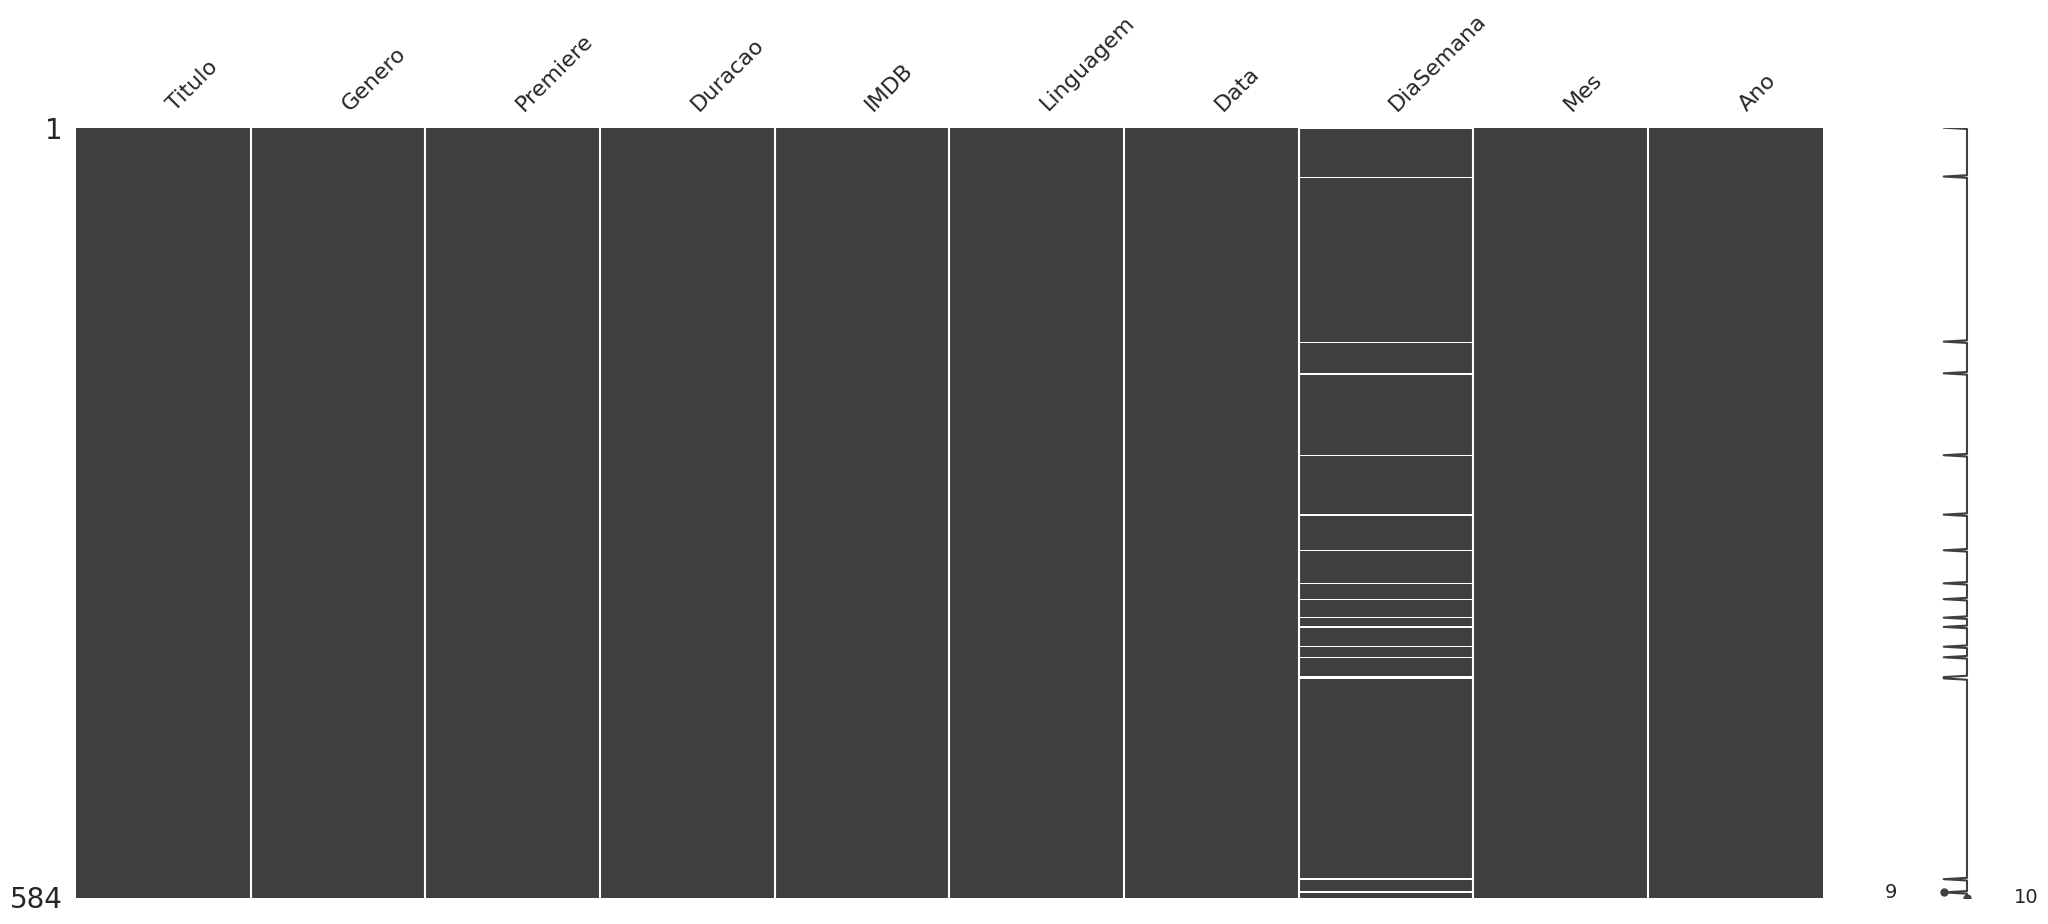

In [ ]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(ds.columns)

# o novo dataset irá conter todas as colunas do dataset original
dsNoMiss = ds[col[:]]

# substituindo os zeros por NaN - sem neessidade desta etapa
dsNoMiss.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dsNoMiss)

In [ ]:
# verificando novamente nulls no dataset
dsNoMiss.isnull().sum()

Titulo        0
Genero        0
Premiere      0
Duracao       0
IMDB          0
Linguagem     0
Data          0
DiaSemana    17
Mes           0
Ano           0
dtype: int64

Como esperado, a análise mostra apenas o falso Missing, uma vez que o valor 0 na variavel categórica DiaSemana é válido e significa "Domingo".

Desprezando as colunas derivadas de Premiere e reavaliando

---



<Axes: >

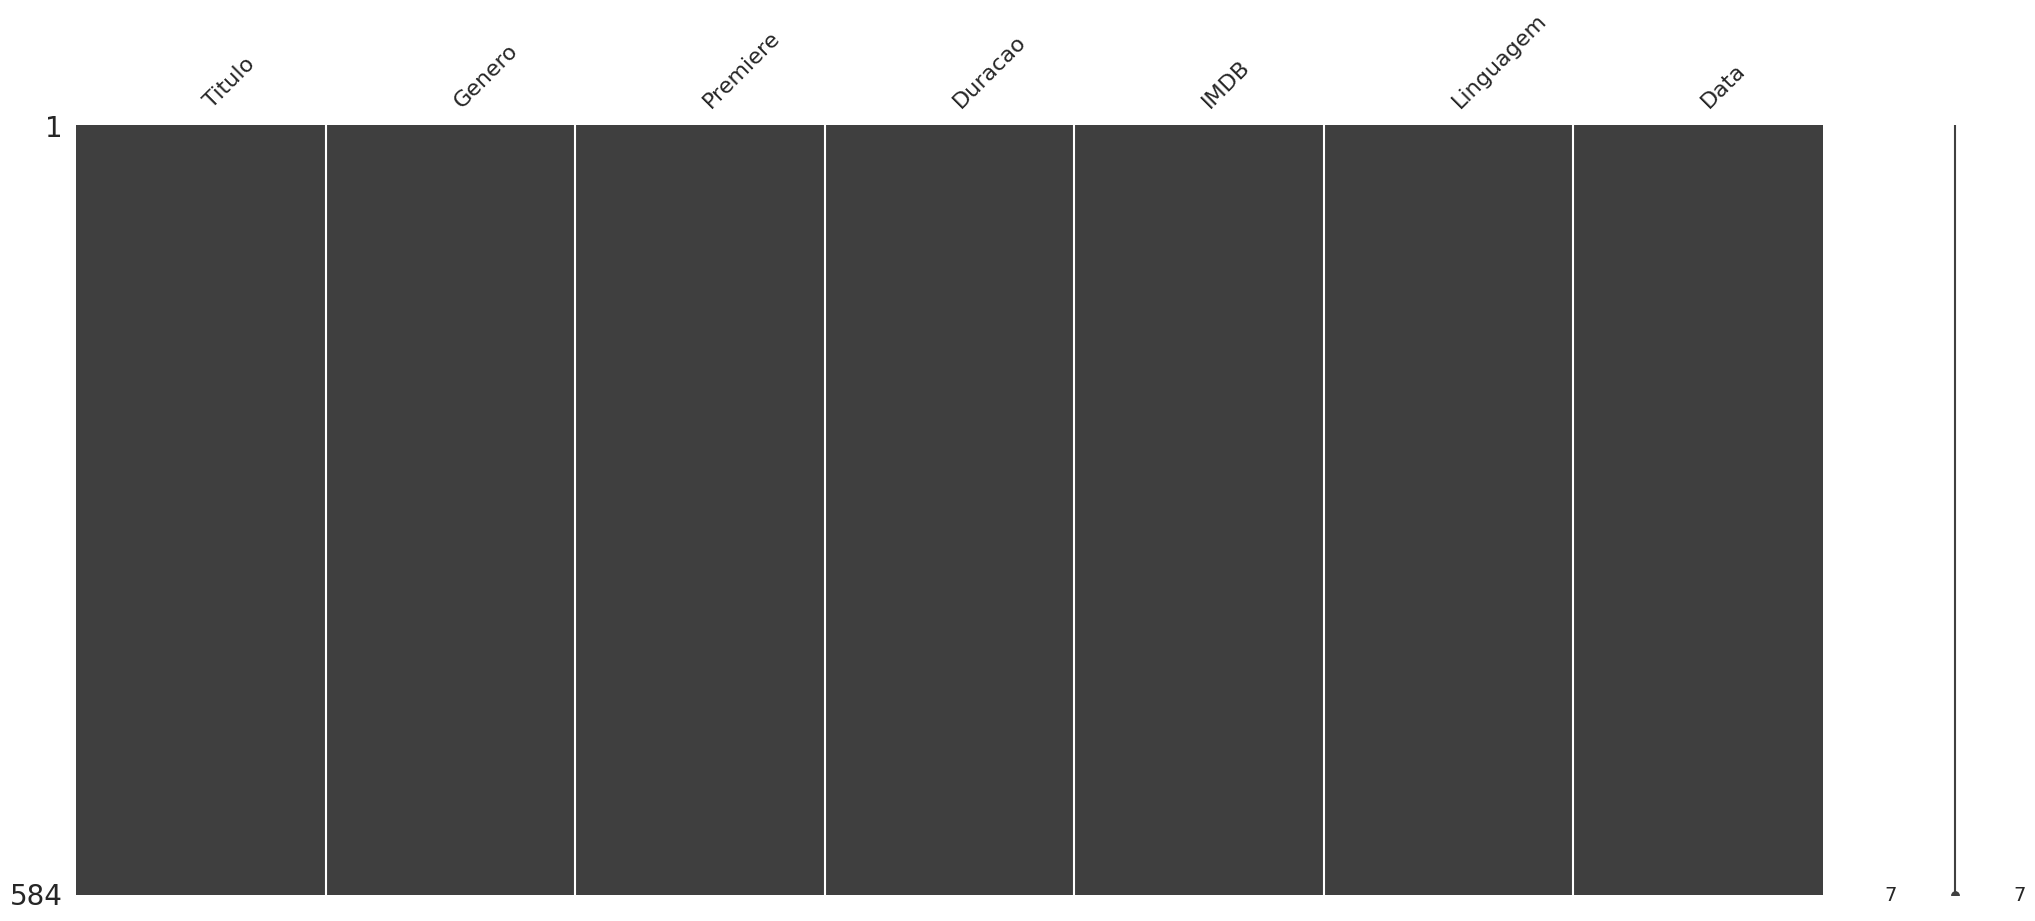

In [ ]:
# removendo as colunas deviradas de Premiere
dsNoMiss.drop(['Ano', 'Mes', 'DiaSemana'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dsNoMiss)



---


**Resumo da análise de Missing e duplicatas**

•	O dataset não apresenta valor nulo no conjunto de dados analisado.

•	Não há variáveis duplicadas.


---



### 4.2. Separação em conjunto de treino e conjunto de teste

Nesta fase iremos determinar um conjunto de testes, que se trata de uma amostra de dados que será usado no treino do futuro modelo. A variável alvo é IMDB.

Será arbitrado que 20% dos dados serão usados para testes e os demais para treino do modelo.

Serão separadas as variaveis preditoras "Genero", "Duracao", "Linguagem", "Ano", "Mes" e "DiaSemana" e a variável alvo "IMDB".

In [ ]:
# Especificando as colunas a serem usadas no treino
col_X = [ 'Genero', 'Duracao', 'Linguagem', 'DiaSemana', 'Mes', 'Ano']
col_y = ['IMDB']
# o novo dataset irá conter todas as colunas do dataset original
dspreditor = ds[col_X[:]]

# definindo parametros de teste/treino
test_size = 0.20 # tamanho do conjunto de testes.
seed = 9 # semente geradora dos numeros aleatórios

X = dspreditor# variaveis preditoras Genero, Duracao, linguagem, Ano, Mes e DiaSemana
y = ds[col_y] # variavel alvo - IMDB

# checando os conjunto criados
print(f'Variaveis preditoras: \n {X[0:5]}')
print(f'Variavel Alvo: \n {y[0:5]}')

# definindo dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação

Variaveis preditoras: 
                   Genero  Duracao         Linguagem  DiaSemana  Mes   Ano
0            Documentary       58  English/Japanese          0    8  2019
1               Thriller       81           Spanish          4    8  2020
2  Science fiction/Drama       79           Italian          3   12  2019
3        Horror thriller       94           English          4    1  2018
4                Mystery       90             Hindi          4   10  2020
Variavel Alvo: 
    IMDB
0   2.5
1   2.6
2   2.6
3   3.2
4   3.4


In [ ]:
# Checando dados de treino e teste
print(f'X_train:\n {X_train}, \n X_test:\n {X_test}, \n y_train:\n{y_train}, \n y_test:\n{y_test}')

X_train:
            Genero  Duracao         Linguagem  DiaSemana  Mes   Ano
138        Comedy      103           English          4    8  2020
529   Documentary       40           English          2    7  2020
518  Comedy-drama       97           English          4    6  2016
269         Drama      111           English          4    4  2021
287   Crime drama      120  English/Japanese          4    3  2018
..            ...      ...               ...        ...  ...   ...
125        Comedy      103           English          4    5  2019
56          Drama       86        Indonesian          3   10  2020
501   Documentary       24           English          1    9  2016
348        Horror       94             Hindi          2    6  2020
382         Drama      132            Korean          4    4  2021

[467 rows x 6 columns], 
 X_test:
                  Genero  Duracao Linguagem  DiaSemana  Mes   Ano
317               Drama       99   English          4    3  2019
98   Supernatural dr

**Transformação categórica** 

Passando a preparar os dados categóricos de treino e teste para futuro uso nos modelos de ML - a variável de classe IMDB já é numérica

In [ ]:
# one hot encode para os atributos treino e teste de X
encoded_X_train = OneHotEncoder(sparse=False).fit_transform(X_train)
encoded_X_test = OneHotEncoder(sparse=False).fit_transform(X_test)


## **Conclusão**



---

O objetivo desta análise foi o de buscar prever a pontuação IMDB de um determinado lançamento original futuro da Netflix utilizando a base NetflixOriginals. Este é um problema de aprendizado supervisionado por regressão.
As variáveis envolvidas foram:
1.	Title (“Titulo”) - Título do filme
2.	Genre (“Genero”) - Gênero do filme
3.	Premiere - Data de estreia do filme original
4.	Runtime (“Duracao”) - Tempo de execução do filme em minutos
5.	IMDB Score (“IMDB”) - Pontuações do IMDB que indicam a aceitação do público para o produto original lançado
6.	Language (“Linguagem”) - Linguagem na qual o filme foi produzido

A variável Premiere foi desdobrada em 3 novas variáveis: 
7.	Ano – ano dos lançamentos;
8.	Mês – mês dos lançamentos;
9.	DiaSemana – dia da semana dos lançamentos

**Com relação a análise, em função da duração dos filmes:**

•	Não há correlação aparente entre o tempo de exibição (Duracao) e a avaliação obtida (IMDB).

•	Aparentemente as maiores pontuações IMDB se situam em volta da média de duração (90 minutos), com até uma variação correspondente a um desvio padrão de distância (30 minutos).

•	Os filmes com menor tempo de duração, abaixo de 1 desvio padrão (cerca de menos de 60 minutos) tem avaliações mais altas em comparação a média.

•	Observou-se uma leve tendência de queda na pontuação média anual dos lançamentos desde 2015, inversamente proporcional a quantidade de lançamentos, o que pode sugerir uma estratégia da Netflix em privilegiar a quantidade em detrimento à qualidade dos lançamentos.

**A análise do gênero e linguagem mostrou o seguinte:**

•	A análise sugere que existem linguagens com melhor pontuação. Os filmes na linguagem em inglês (English), que tem uma amostragem maior, apresentaram uma pontuação IMDB próxima a média; outras linguagens como japonês, espanhol, português, marathi, e Hindi apresentaram comportamento similar, sugerindo possível relação.

•	Sobre os gêneros, a análise mostrou alguma relação com o tipo de gênero e sua pontuação. Os gêneros Documentary, Drama parecem serem os mais bens aceitos, com pontuação acima da média.

•	O gênero Documentary foi o único lançado nos anos de 2014 e 2015, o que explica a grande diferença de quantidade de títulos deste gênero em relação ao segundo colocado.

•	A linguagem "inglês" (English) foi a única lançada em 2014 a 2017, com exceção em 2016 quando o espanhol (Spanish" também foi utilizado, o que explica a grande diferença de quantidade de títulos do inglês em relação ao segundo colocado.


**Sobre o pré-processamento dos dados:**

- A base analisada não continha elementos faltantes, nem nulos. 

- Foi possível criar conjunto de treino e conjunto de teste para treinar um futuro modelo.

- Foi aplicada transformação categórica nas variáveis quantitativas.

**Palavras finais:**

Com base nestas observações e percepções, creio ser possível a construção de um modelo para predizer o valor da pontuação IMDB dos filmes com base nas variáveis preditoras Language (Linguagem), Genre (Gênero), Premiere (ano, mes, Dia da Semana) e Runtime (Duração). 

Seria interessante completar o dataset com os anos 2021 (2a metade), 2022 e 2023 para avaliar se o comportamento estudado das variáveis se mantém.

Finalmente, observo que baseado em pesquisas realizadas em outros datasets similares, creio que o acréscimo de novas variáveis como por exemplo “ator principal” e “diretor”, podem melhorar o processo de predição. 

---

